# BASEBALL CASE STUDY

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [3]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

# EDA

In [4]:
df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

In [5]:
df.sample(10)

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
5   93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
9   78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
1   83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
21  83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
19  64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
14  68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
20  90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   

    SHO  SV    E  
5    10  34   88  
9    10  40   97  
1    12  45   86  
21   13  41   90  
27   12  44   86  
19    8  35   90  
14   15  28  126  
29    4  36   95  
25   21  47   75  
20   14  50   88

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [11]:
df.shape

(30, 17)

In [12]:
df.rename(columns={"W" : "Wins","R":"Runs Scored", "AB":"At Bat","H":"Hits","2B":"Doubles","3B":"Triples","HR":"Home Runs","BB":"Base on Balls","SO":"Strike Outs","SB":"Stolen Base","RA":"Runs Average","ER":"Earned Runs","ERA":"Earned Run Average","CG":"Complete Game", "SHO":"Shut outs","SV":"Saves","E":"Errors"},inplace=True)
df.head()

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
0    95          724    5575  1497      300       42        139   
1    83          696    5467  1349      277       44        156   
2    81          669    5439  1395      303       29        141   
3    76          622    5533  1381      260       27        136   
4    74          689    5605  1515      289       49        151   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
0            383          973          104           641          601   
1            439         1264           70           700          653   
2            533         1157           86           640          584   
3            404         1231           68           701          643   
4            455         1259           83           803          746   

   Earned Run Average  Complete Game  Shut outs  Saves  Errors  
0                3.73              2          8     56      88  
1                4.07              2         12     45      86  
2                3.67             11         10     38      79  
3                3.98              7          9     37     101  
4                4.64              7         12     35      86

In [13]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The acceptable range for skewness is between +/-0.5, columns out of this range must be inspected whether they needed to be treated or not.

In [14]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut outs             12
Saves                 20
Errors                21
dtype: int64

# VISUALIZATION

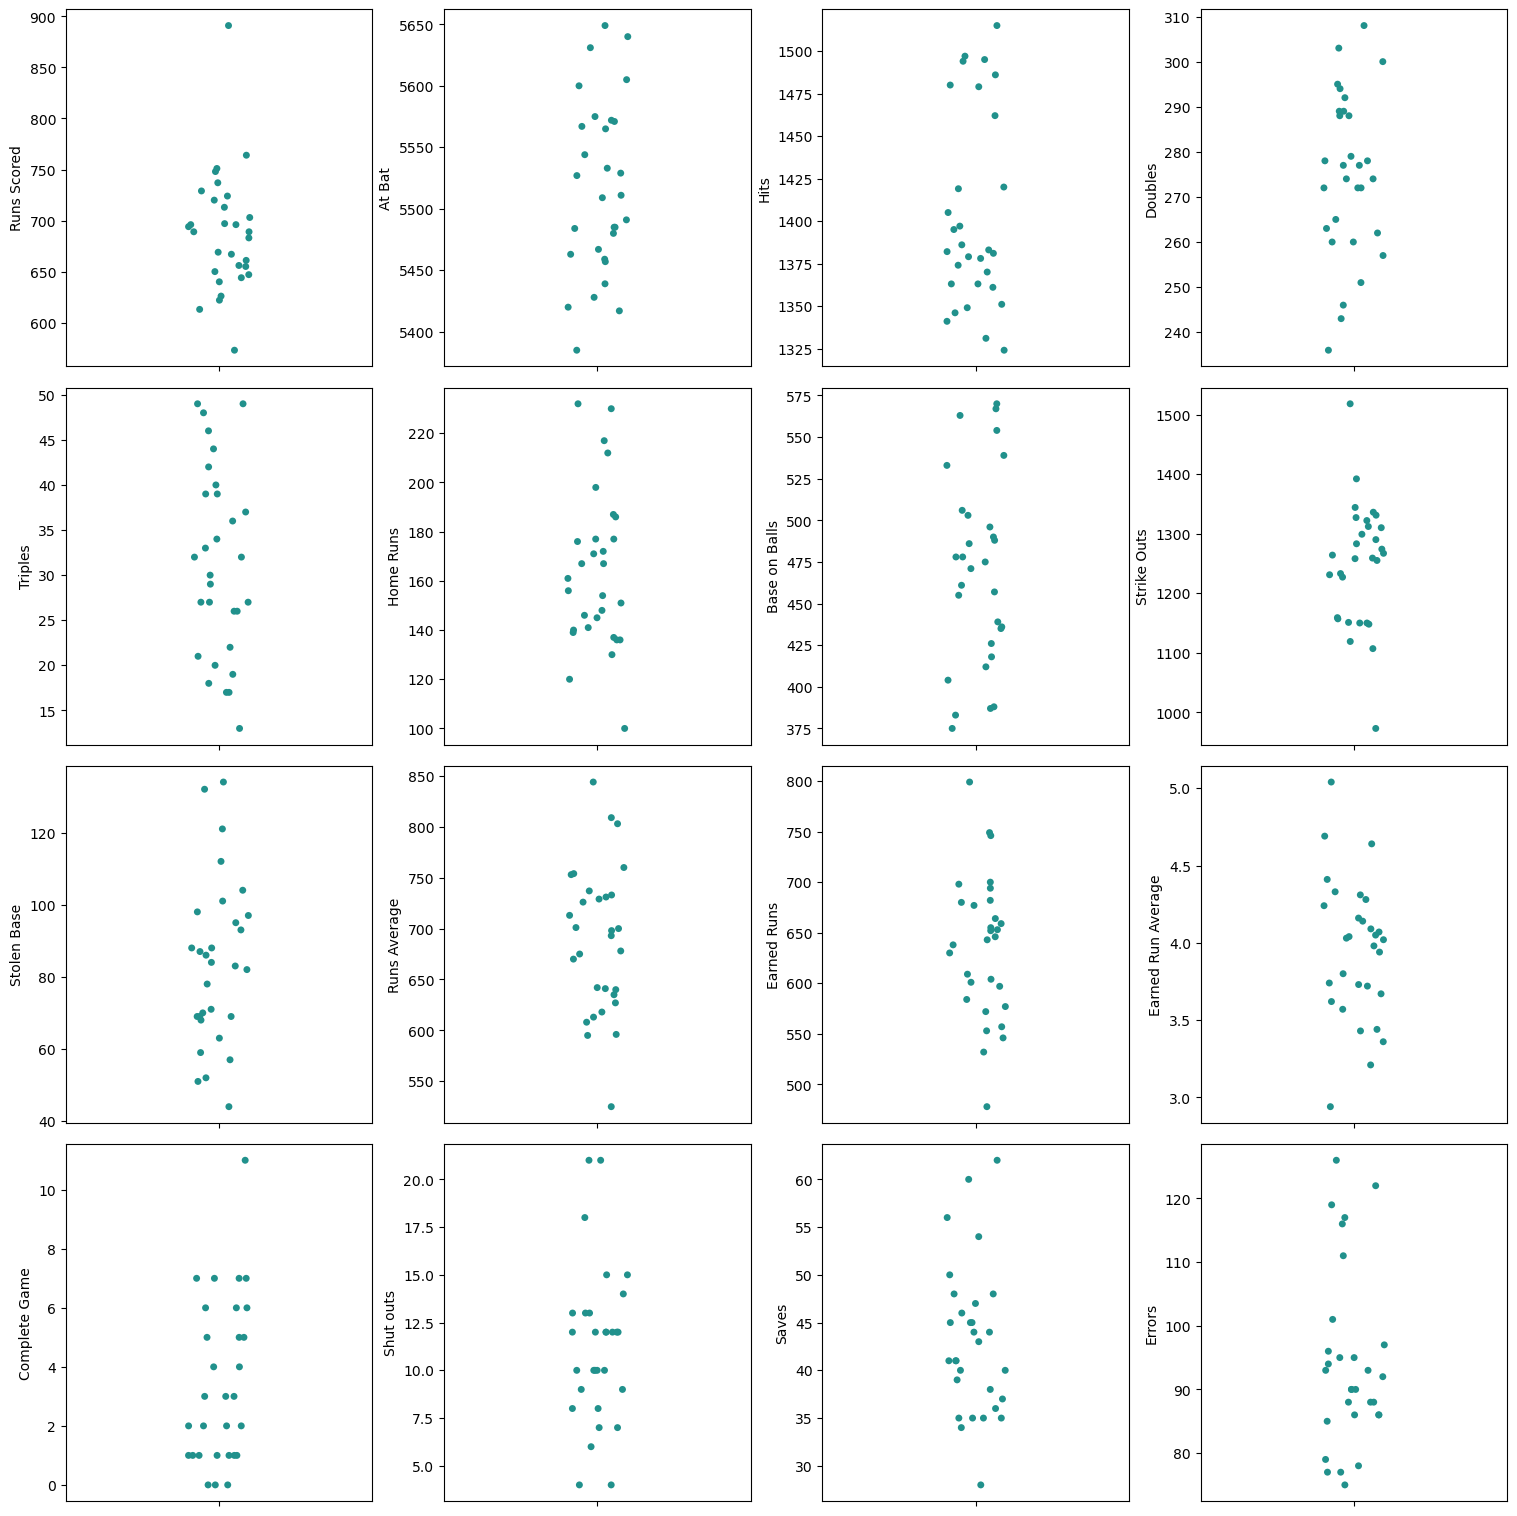

In [15]:
fig, ax=plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index=0
features=df.drop("Wins",axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

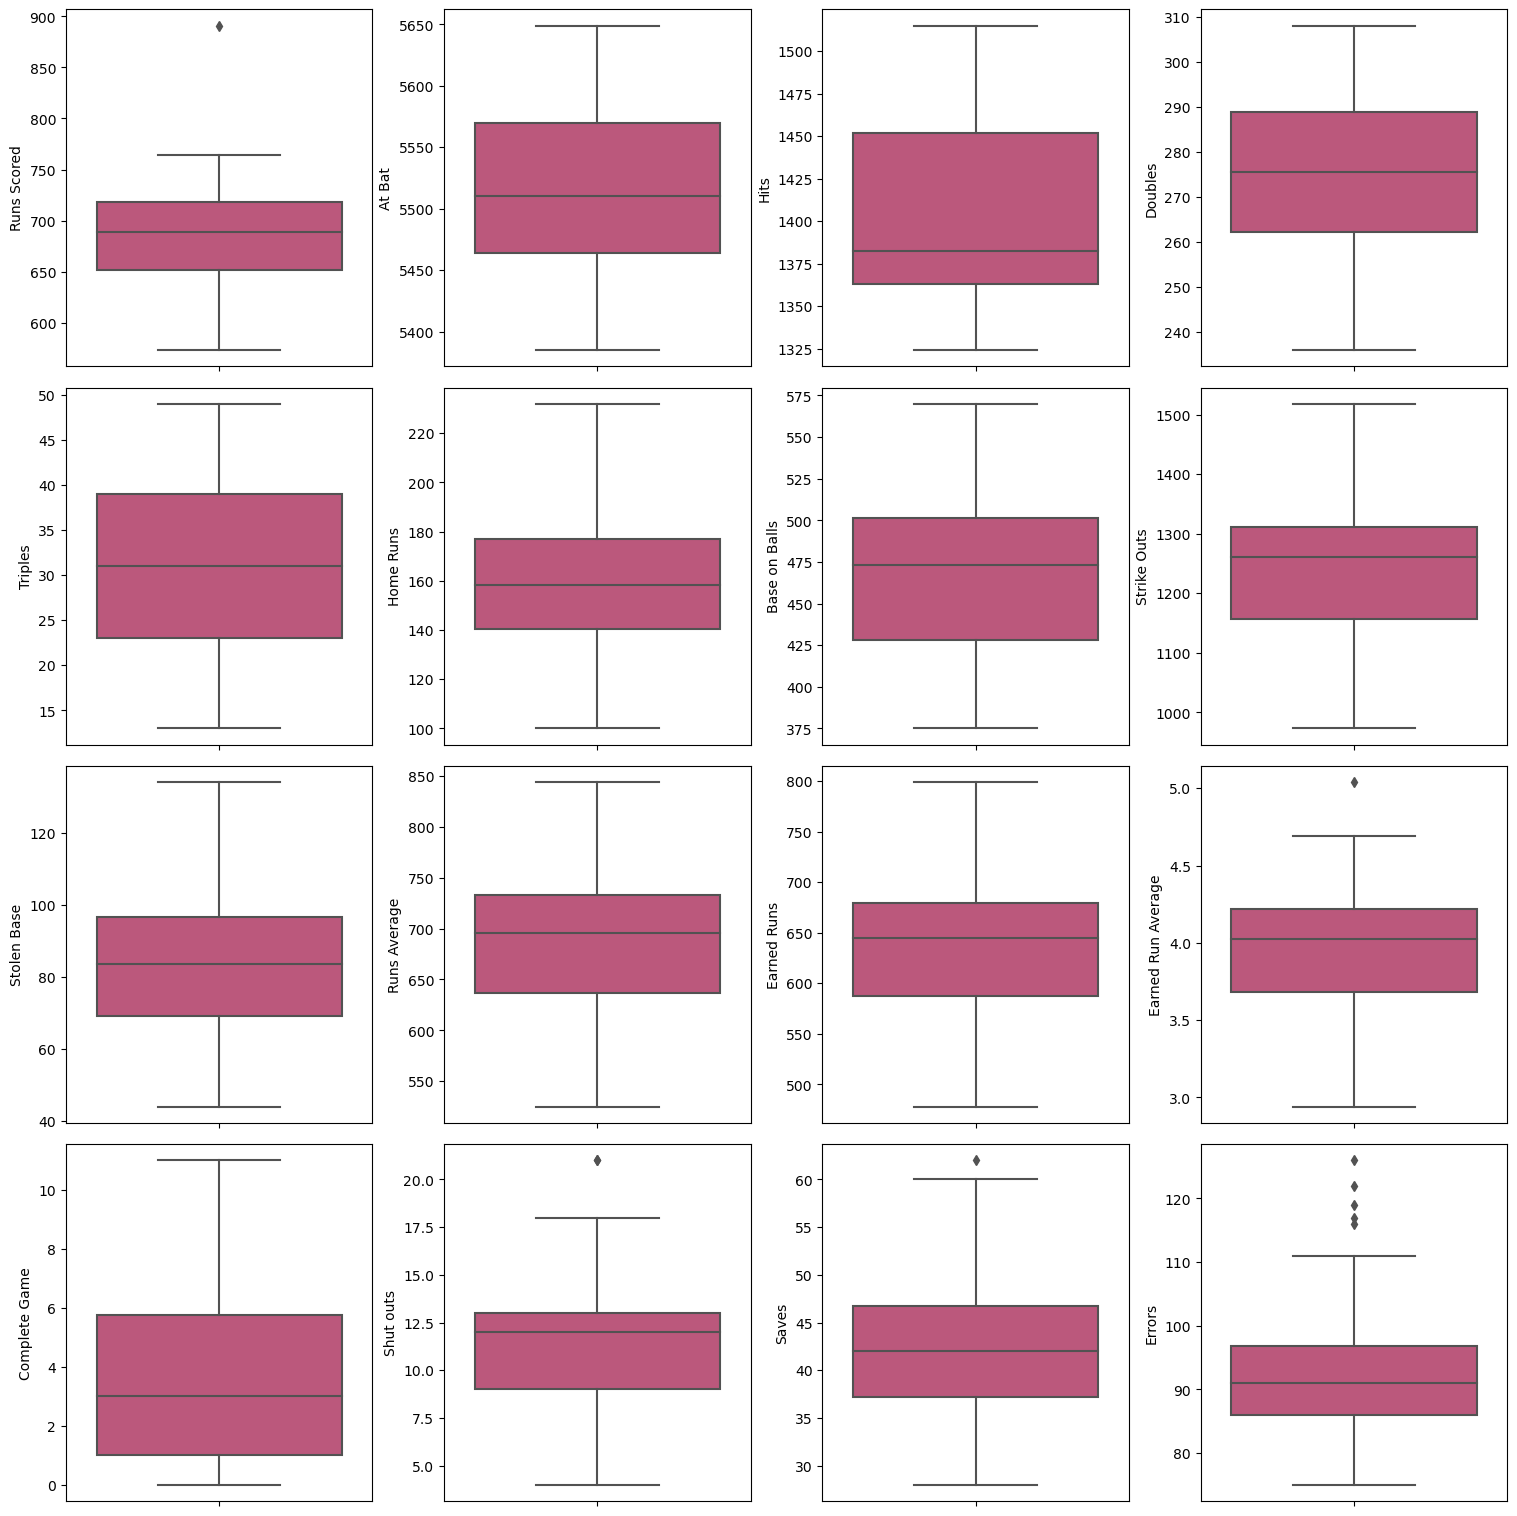

In [16]:
fig, ax=plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index=0
features=df.drop("Wins",axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

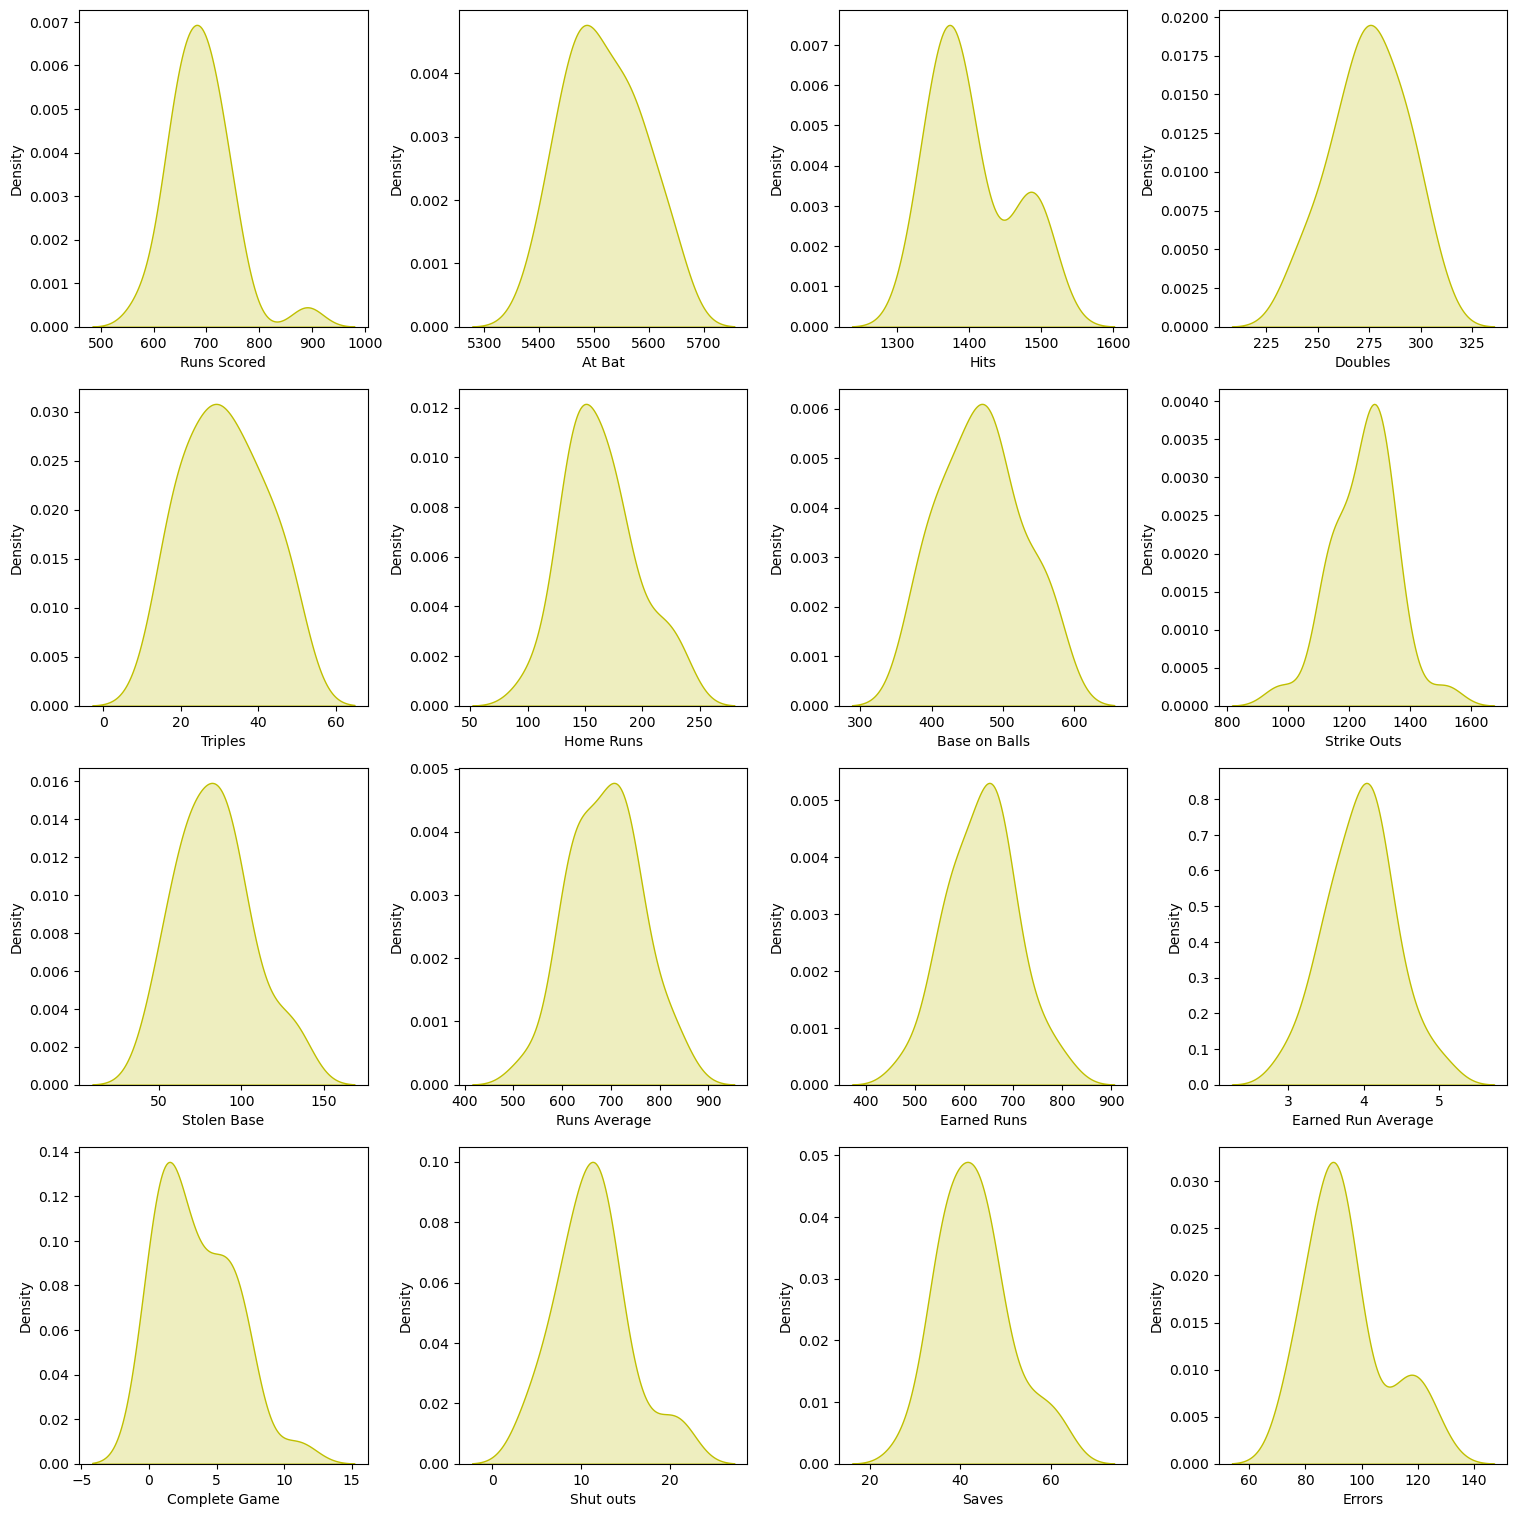

In [17]:
fig, ax=plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index=0
features=df.drop("Wins",axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.distplot(value,ax=ax[index], hist=False, color="y", kde_kws={"shade":True})
    index+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# BIVARIATE ANALYSIS

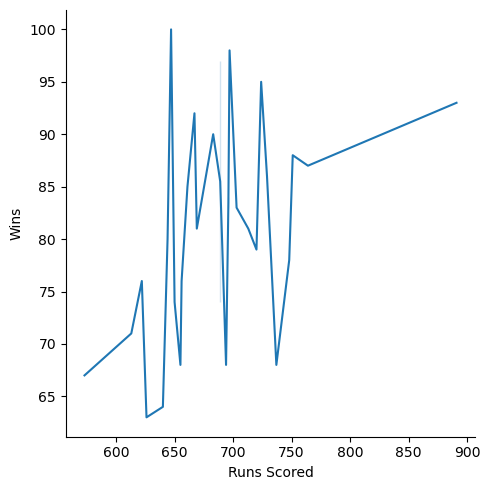

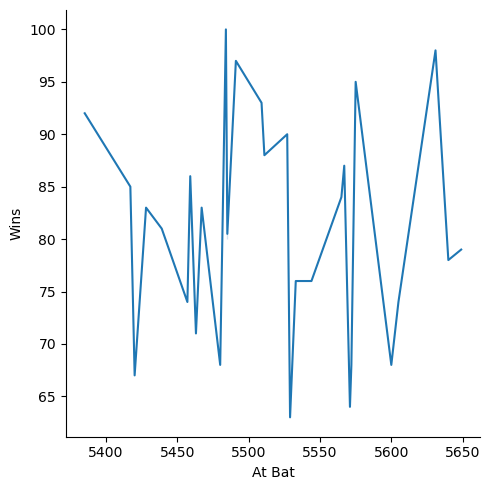

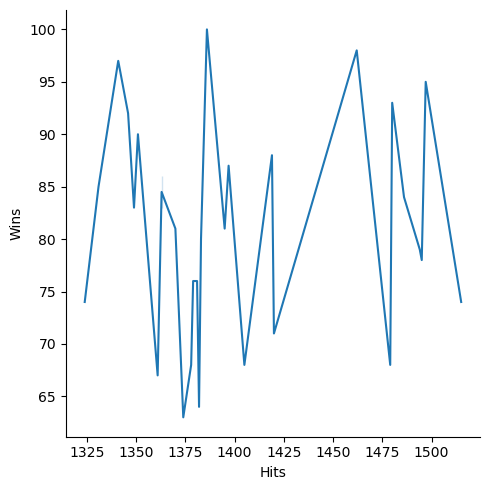

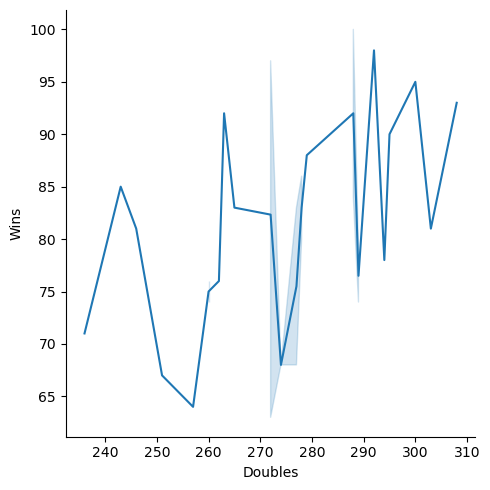

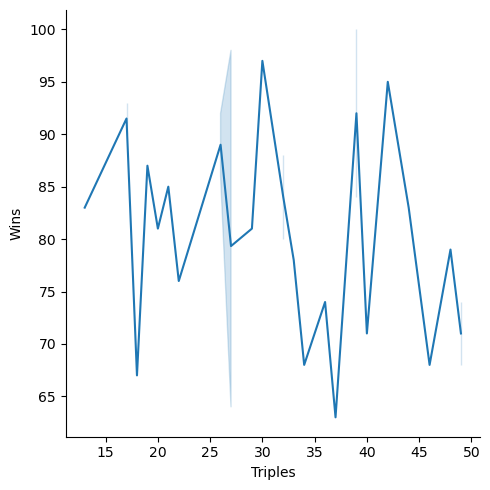

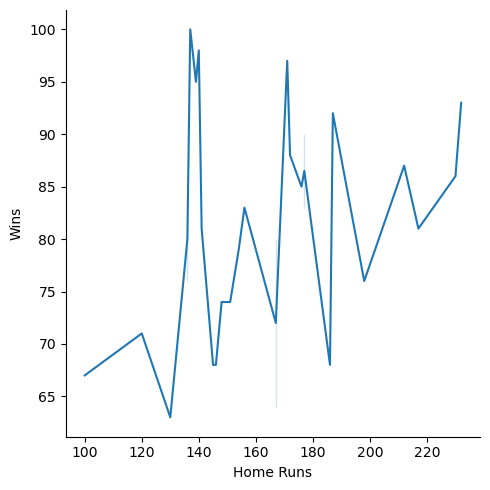

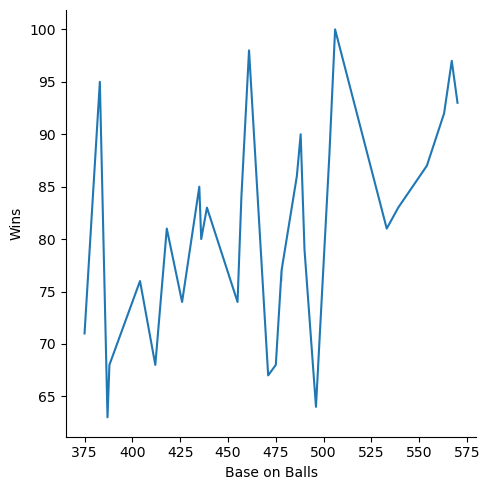

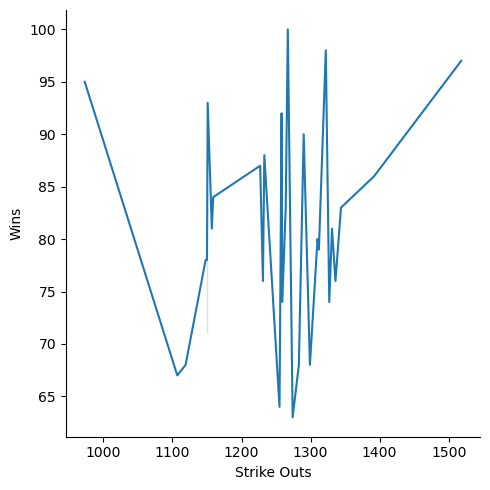

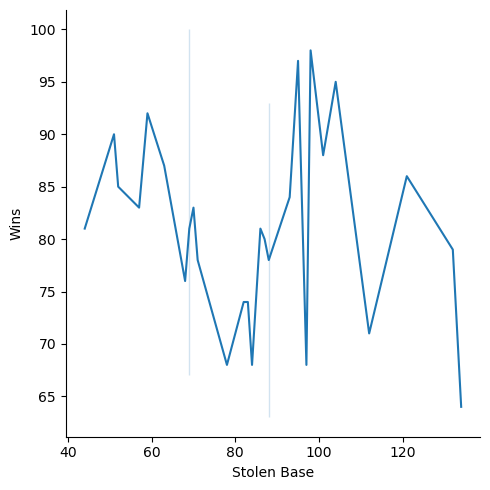

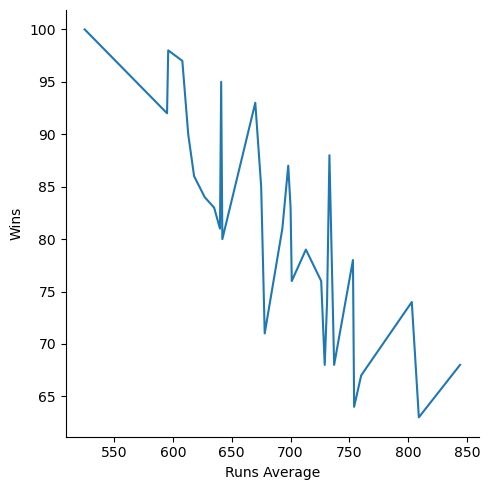

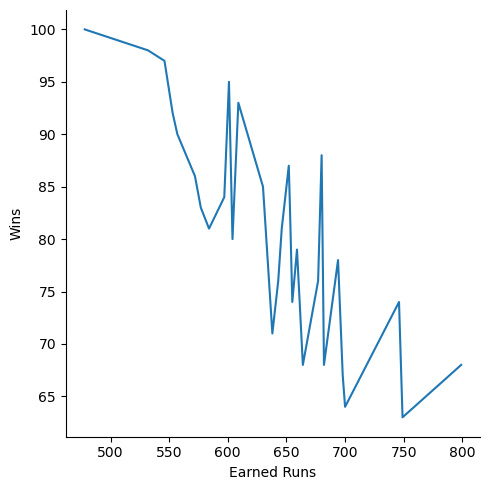

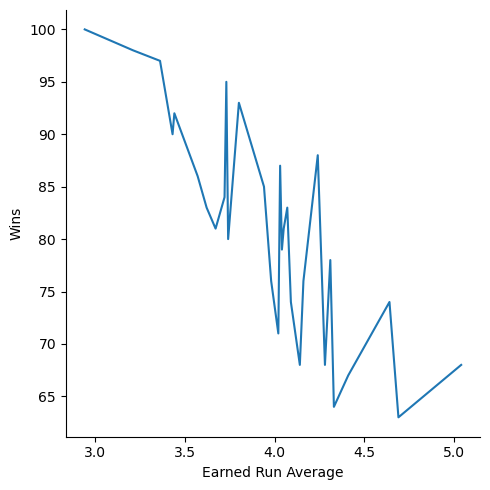

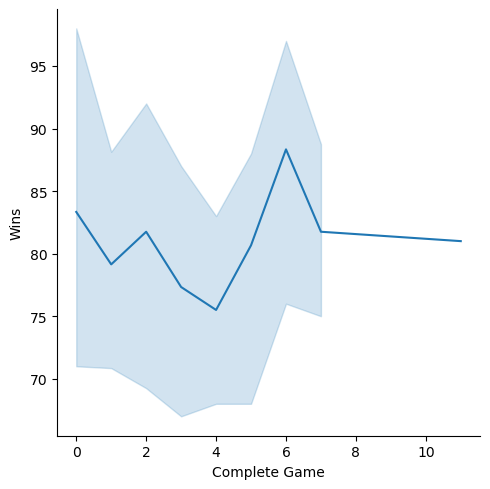

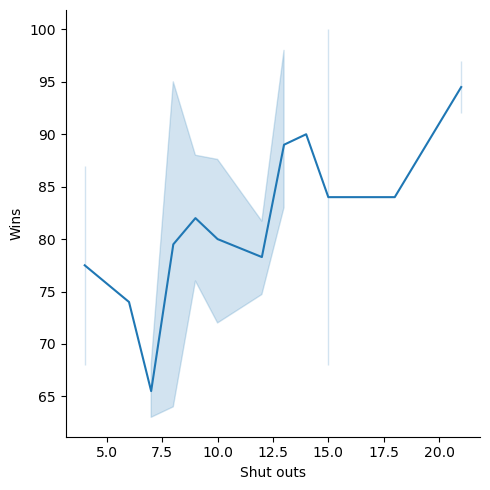

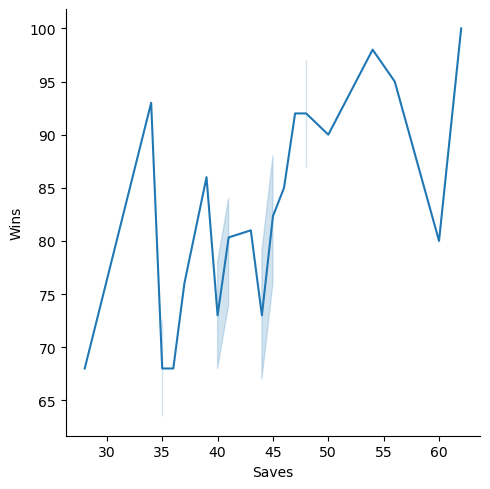

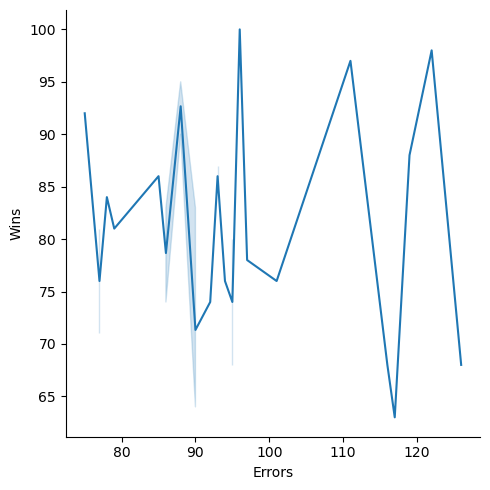

In [18]:
index=0
features=df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index+=1
plt.show()

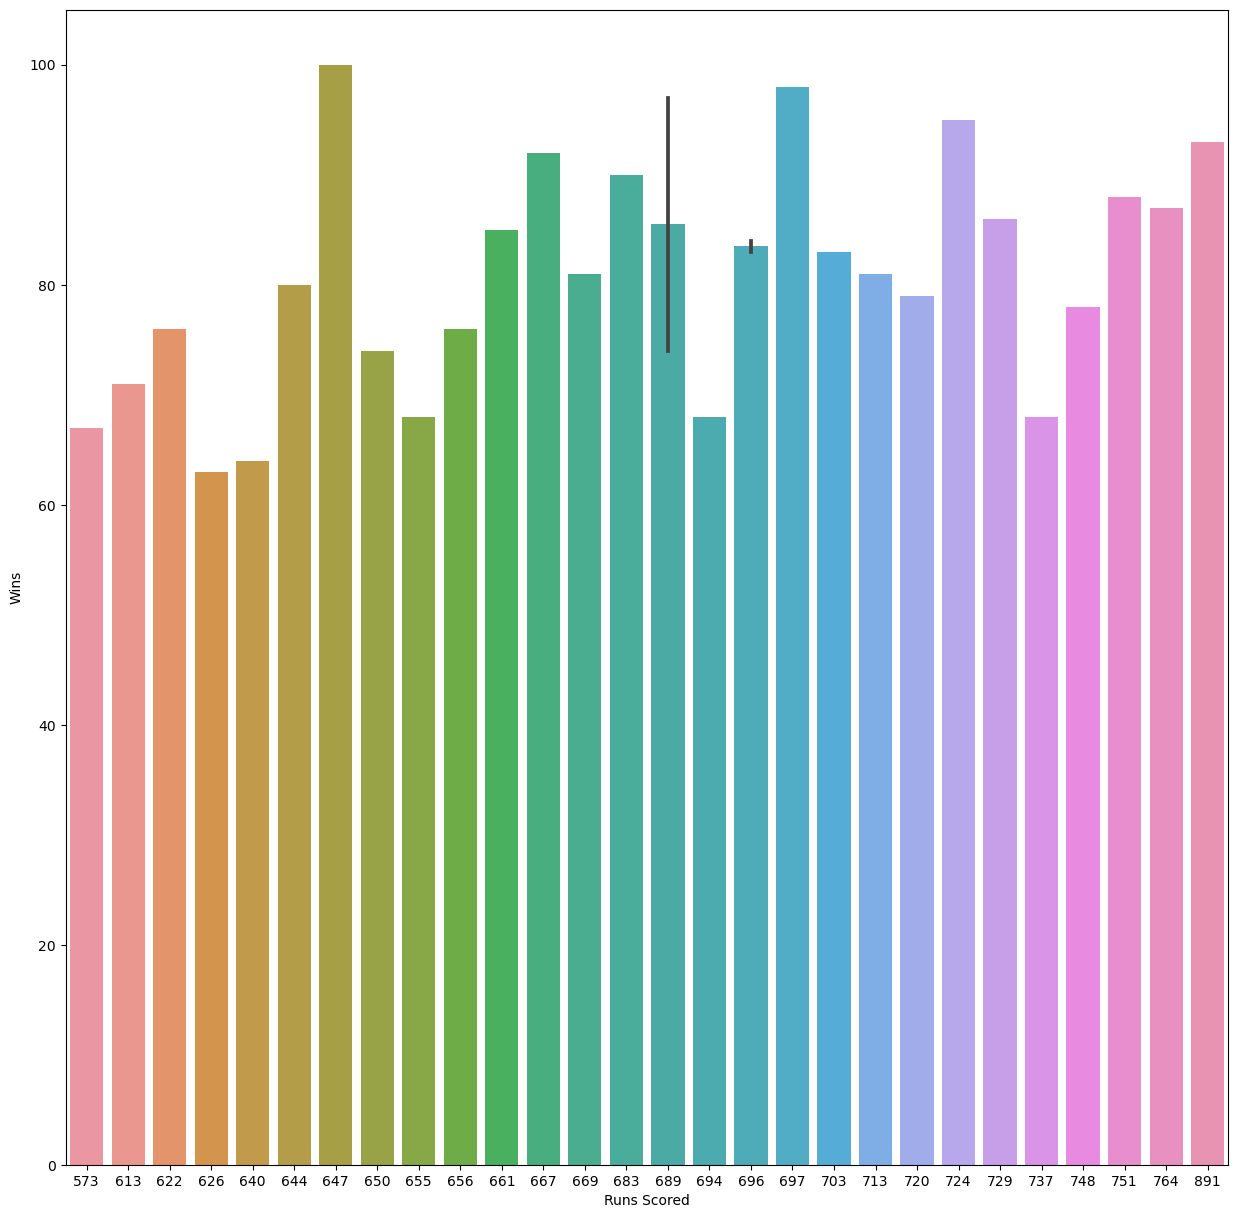

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

Feature "Runs Scored" and it's unique values are distributed unevenly when it comes to relating with our label "Wins".

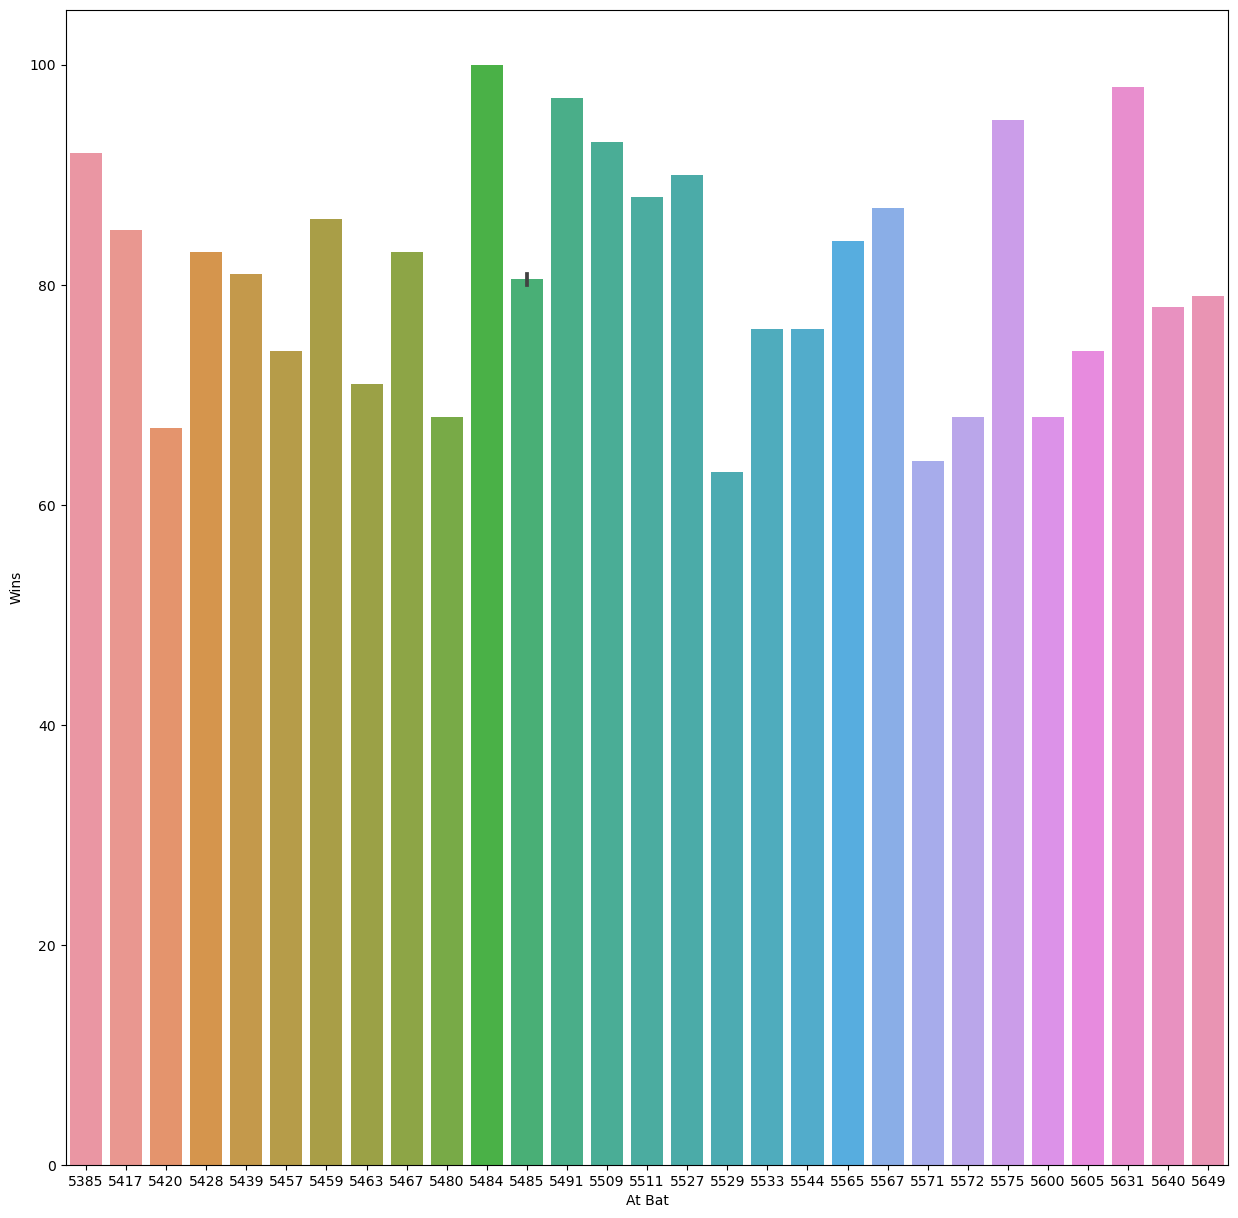

In [20]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

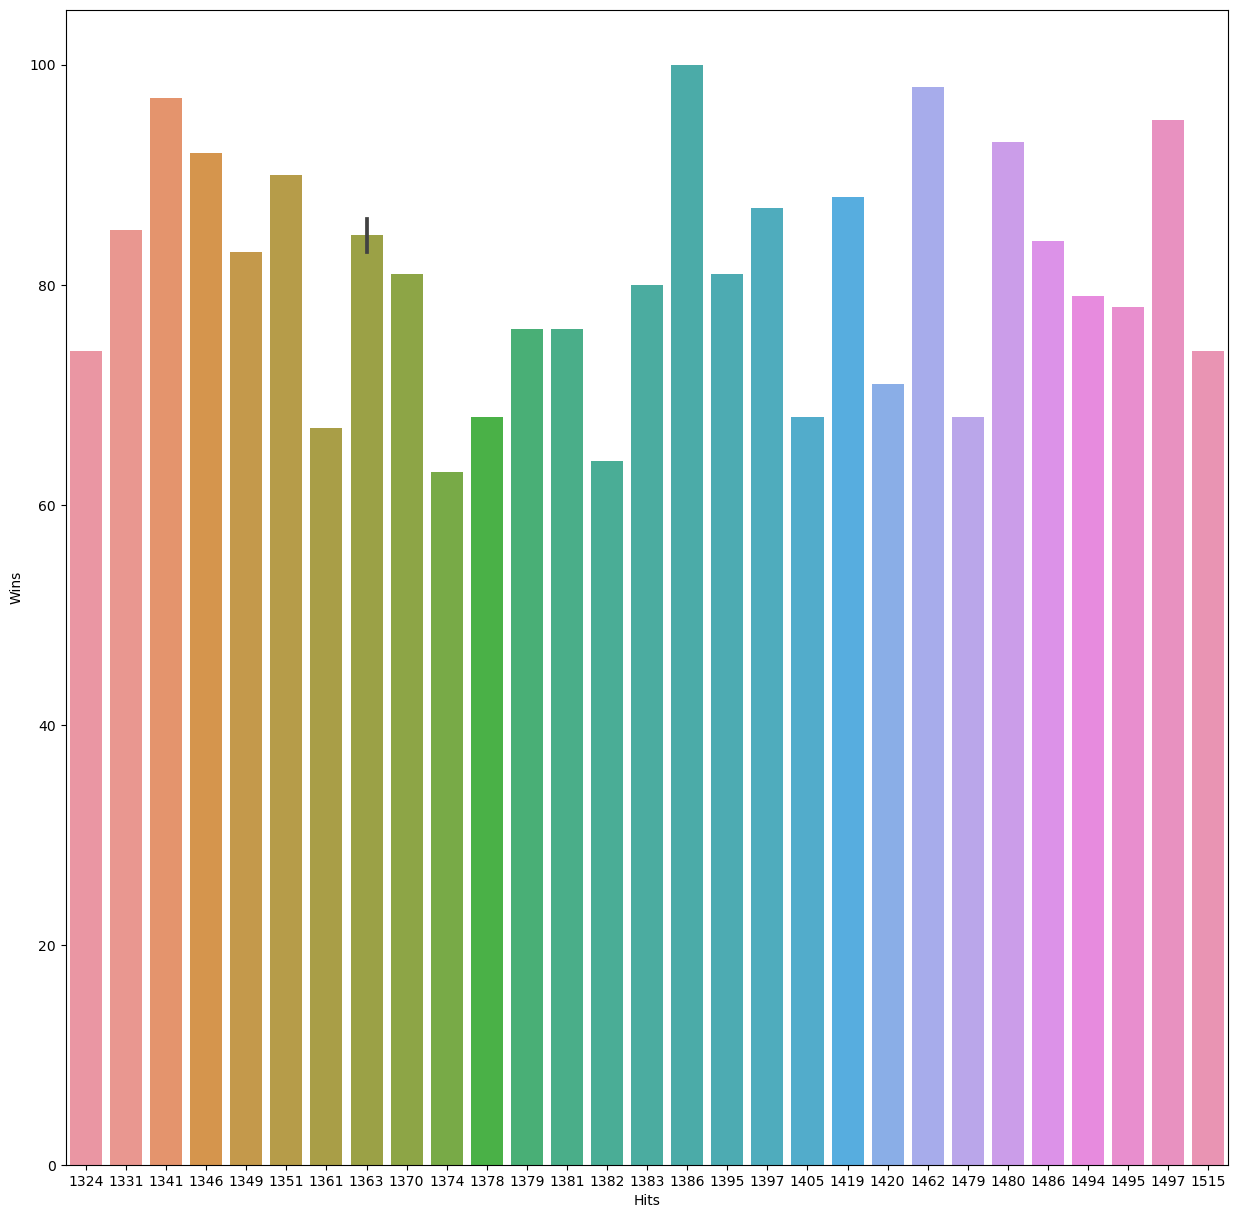

In [21]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

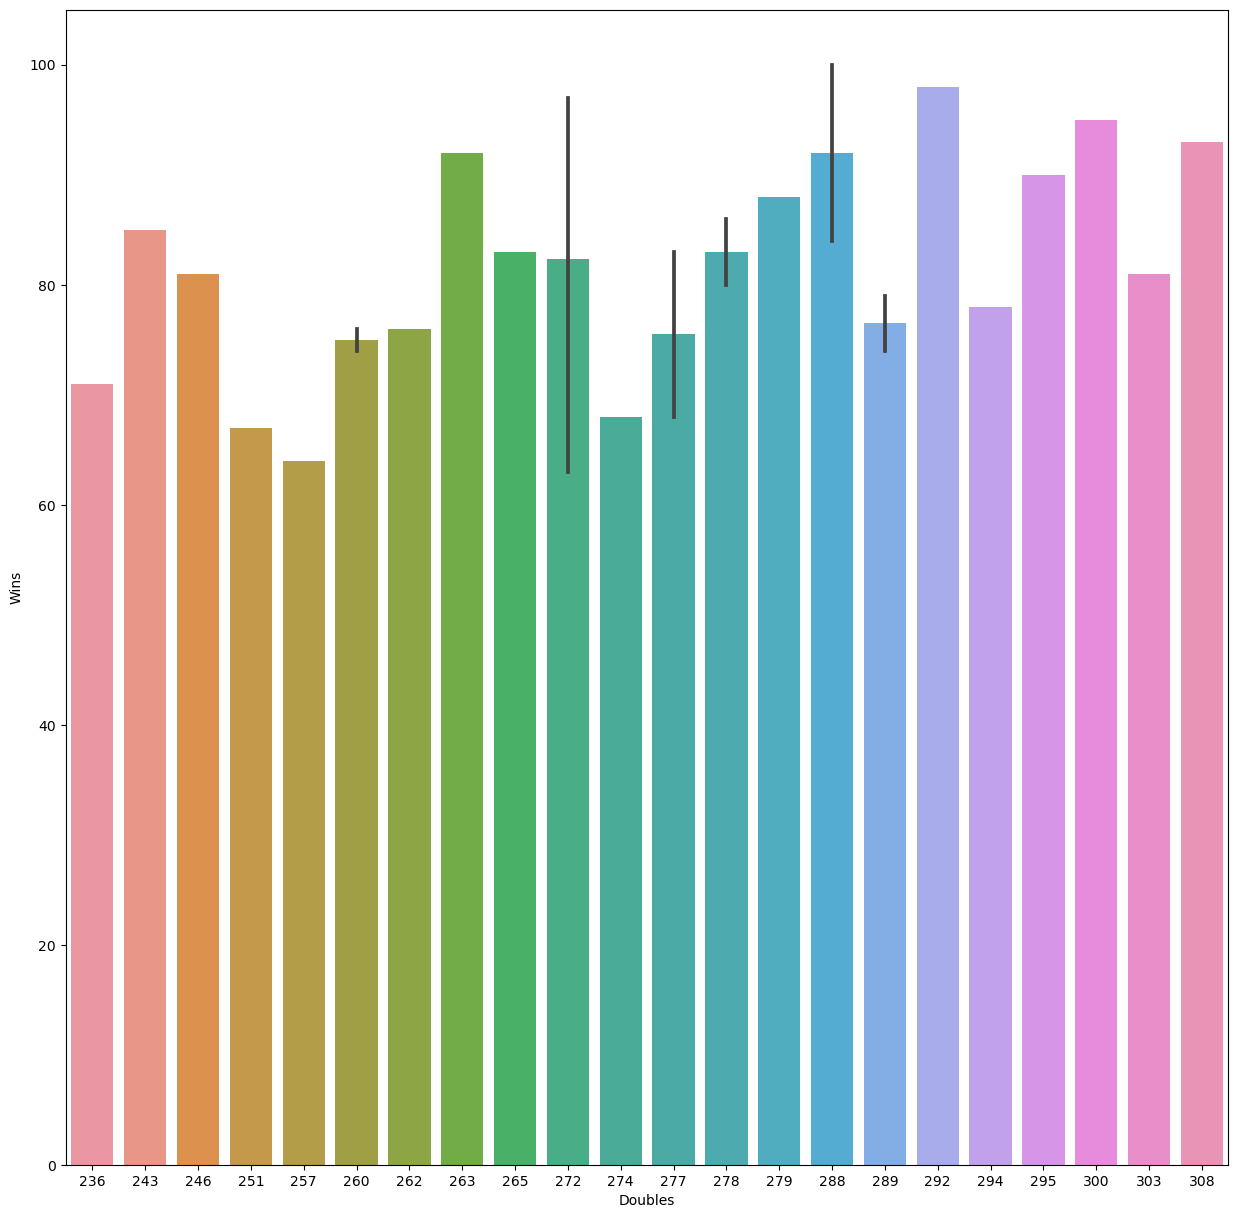

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

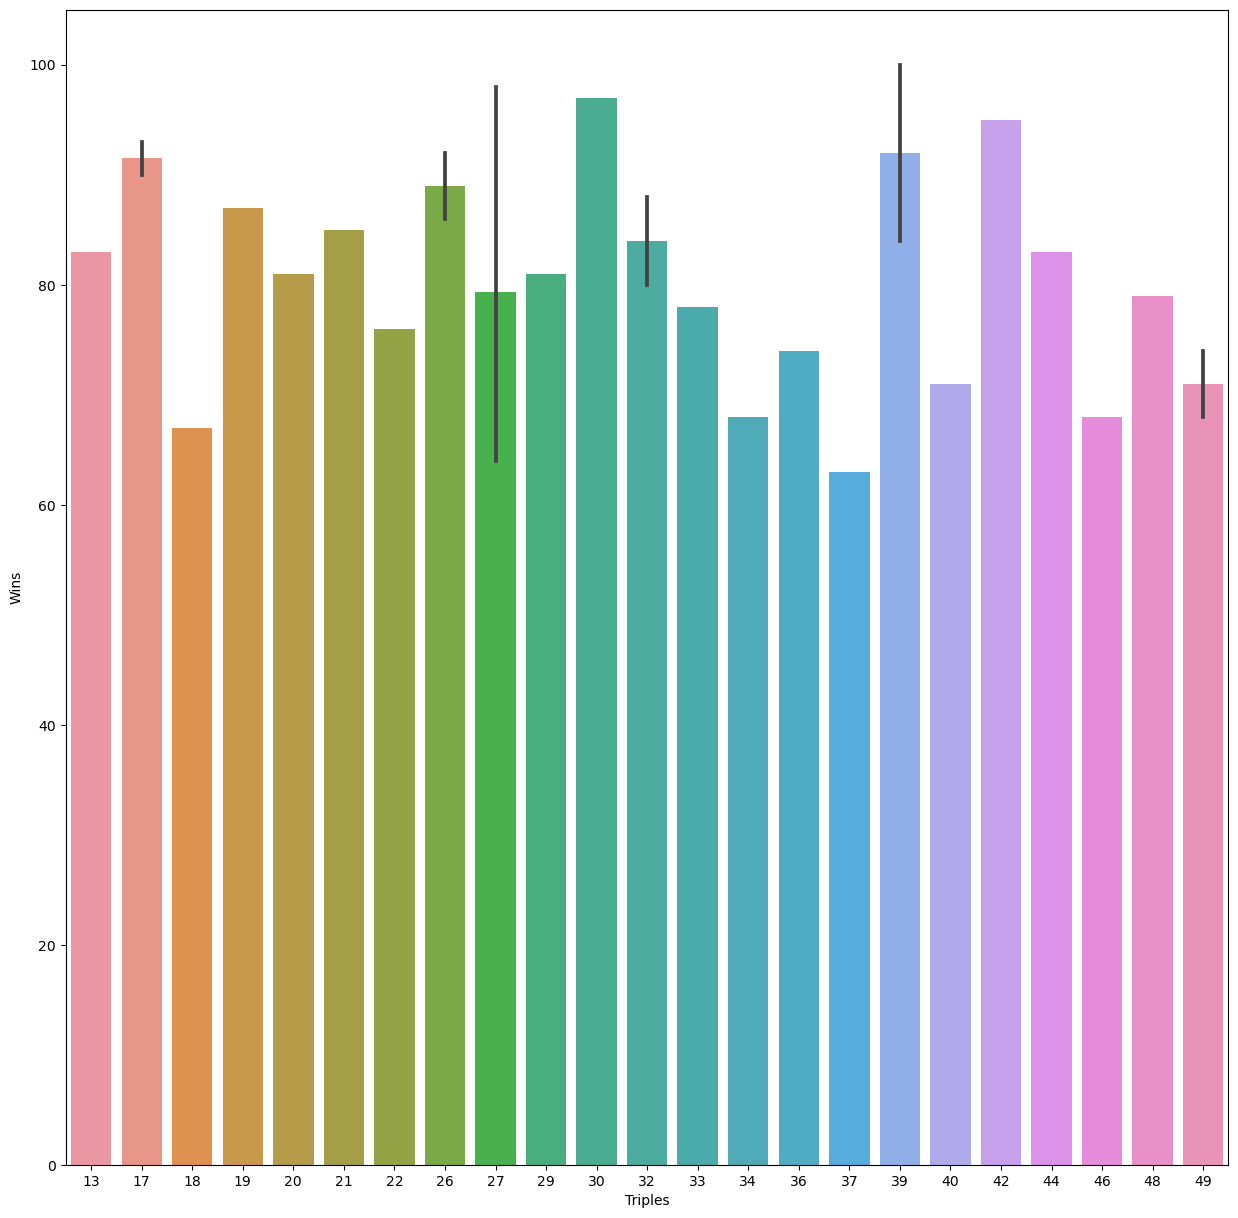

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

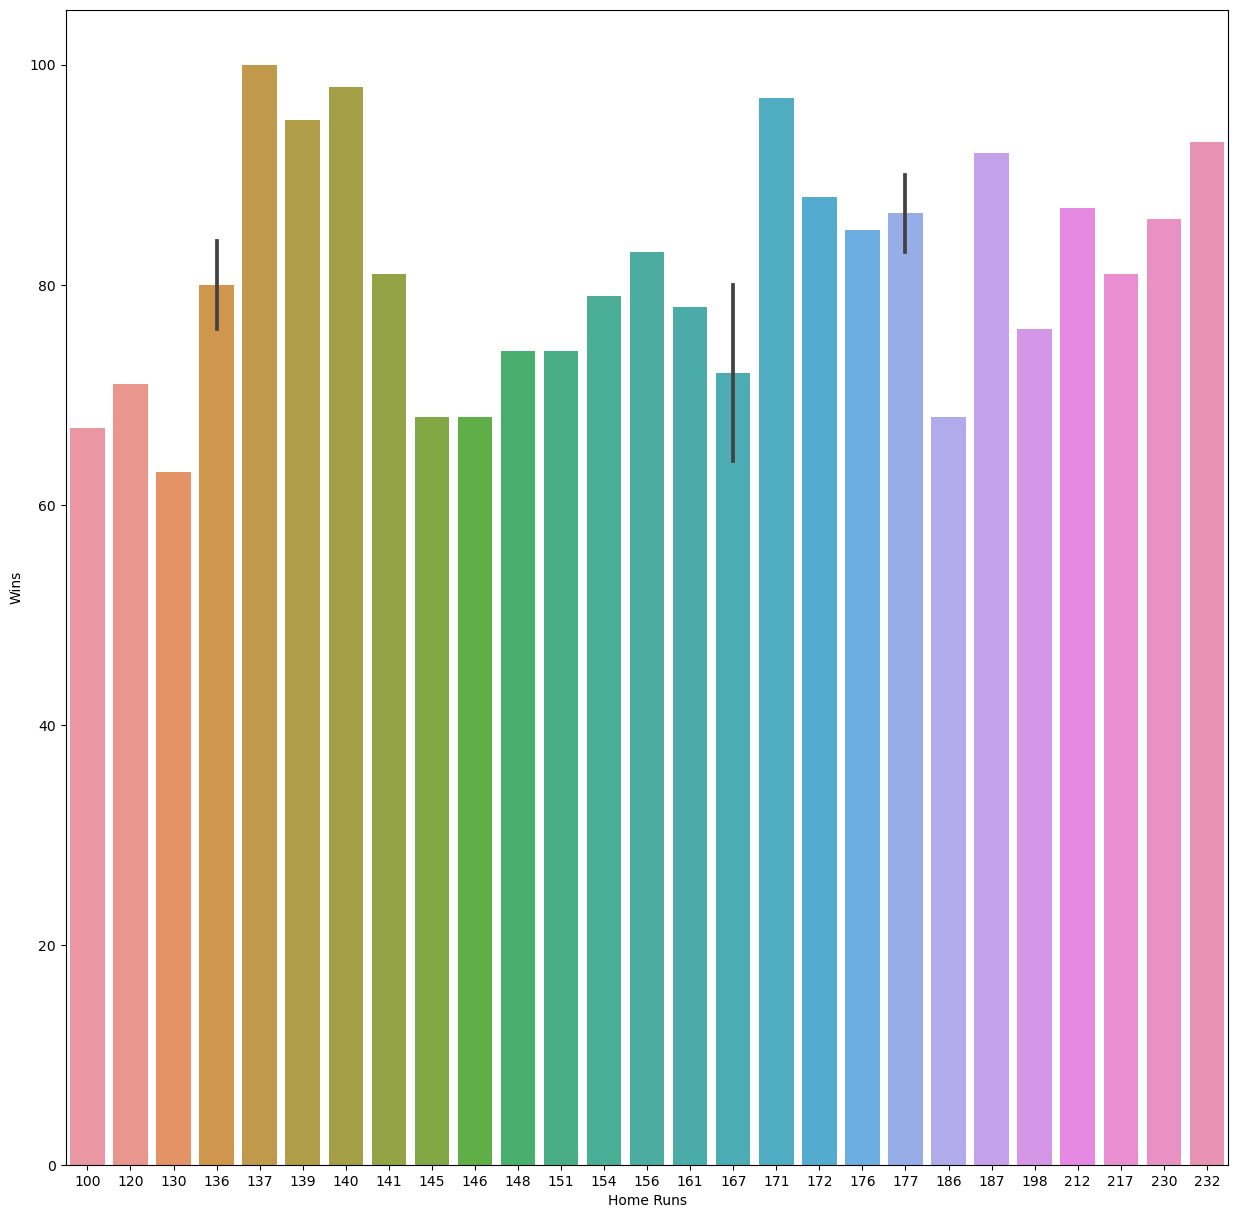

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

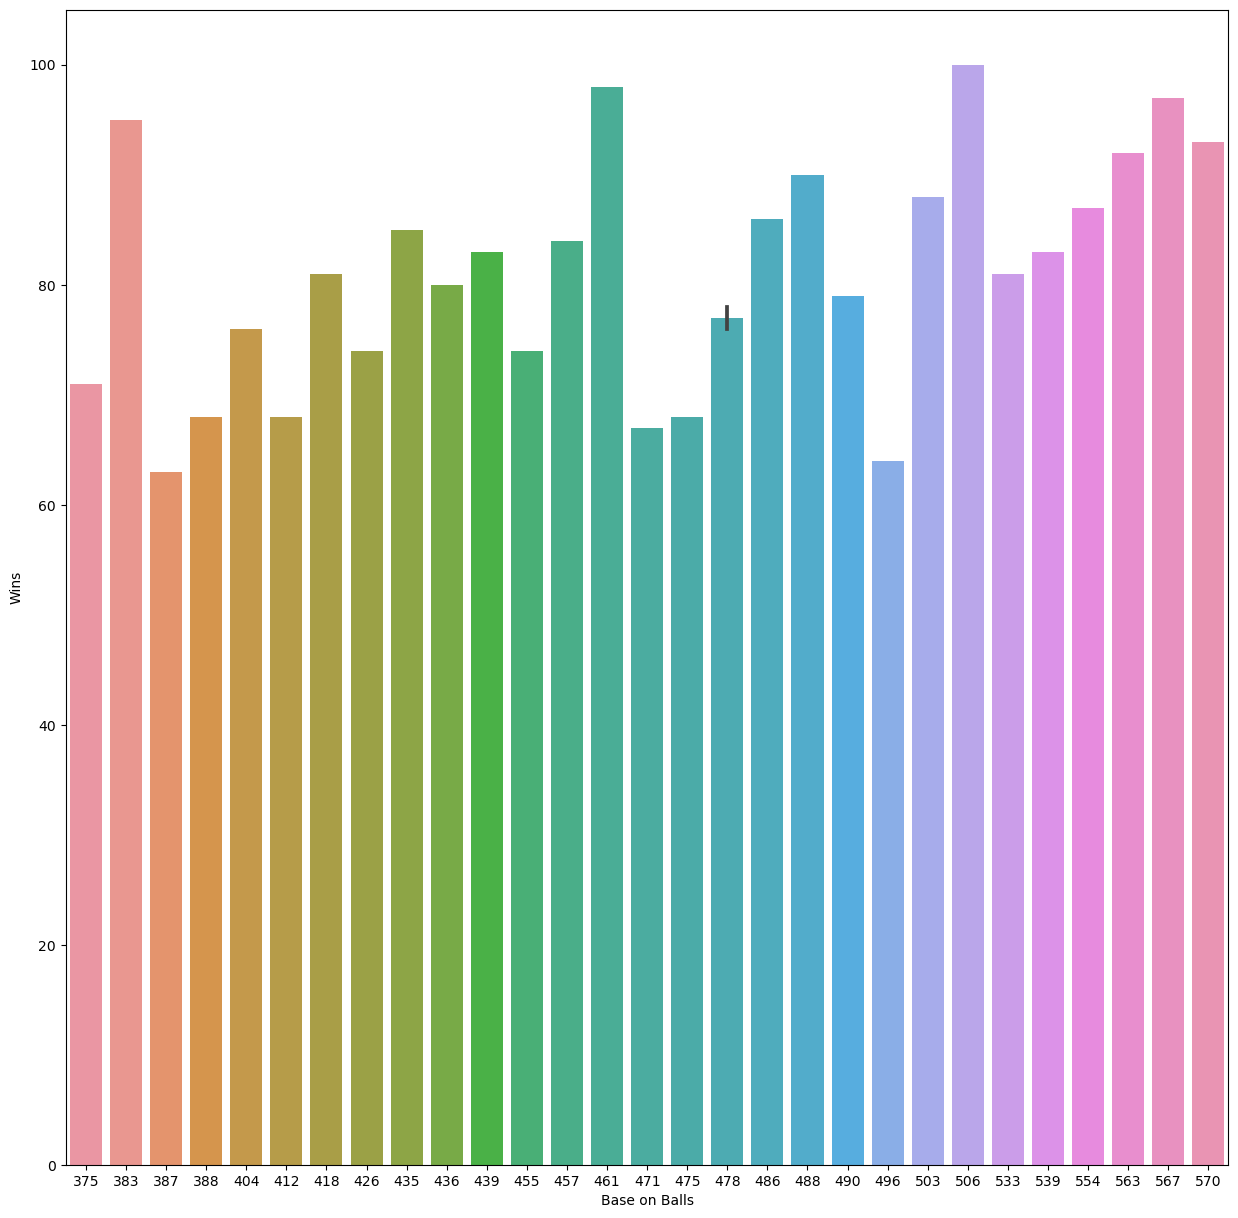

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

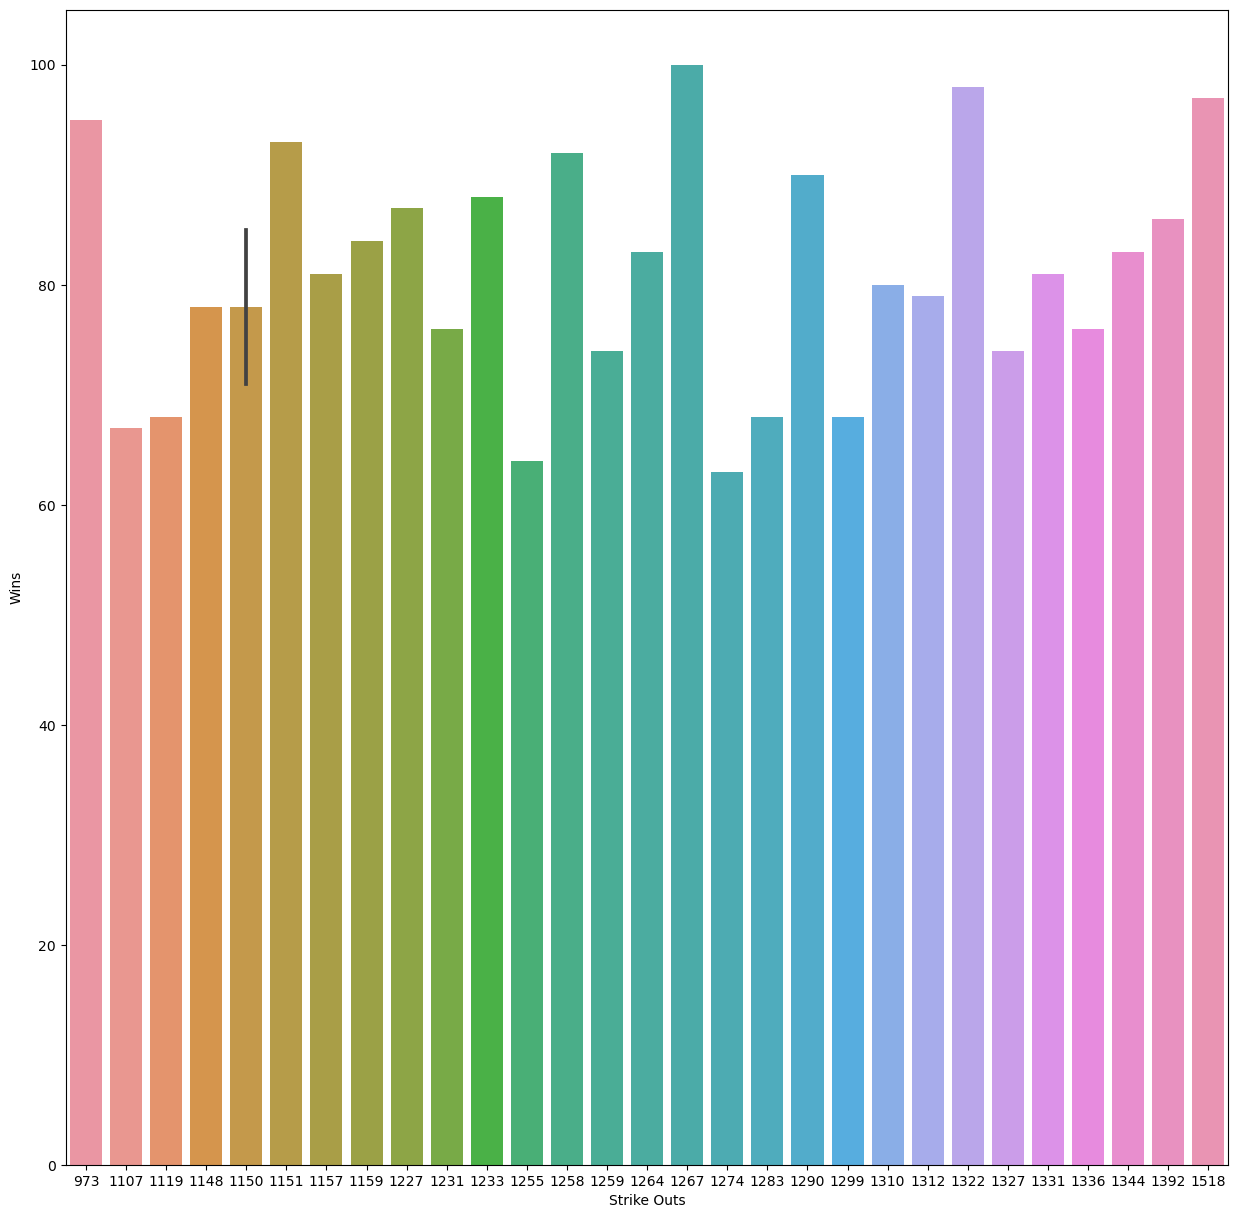

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

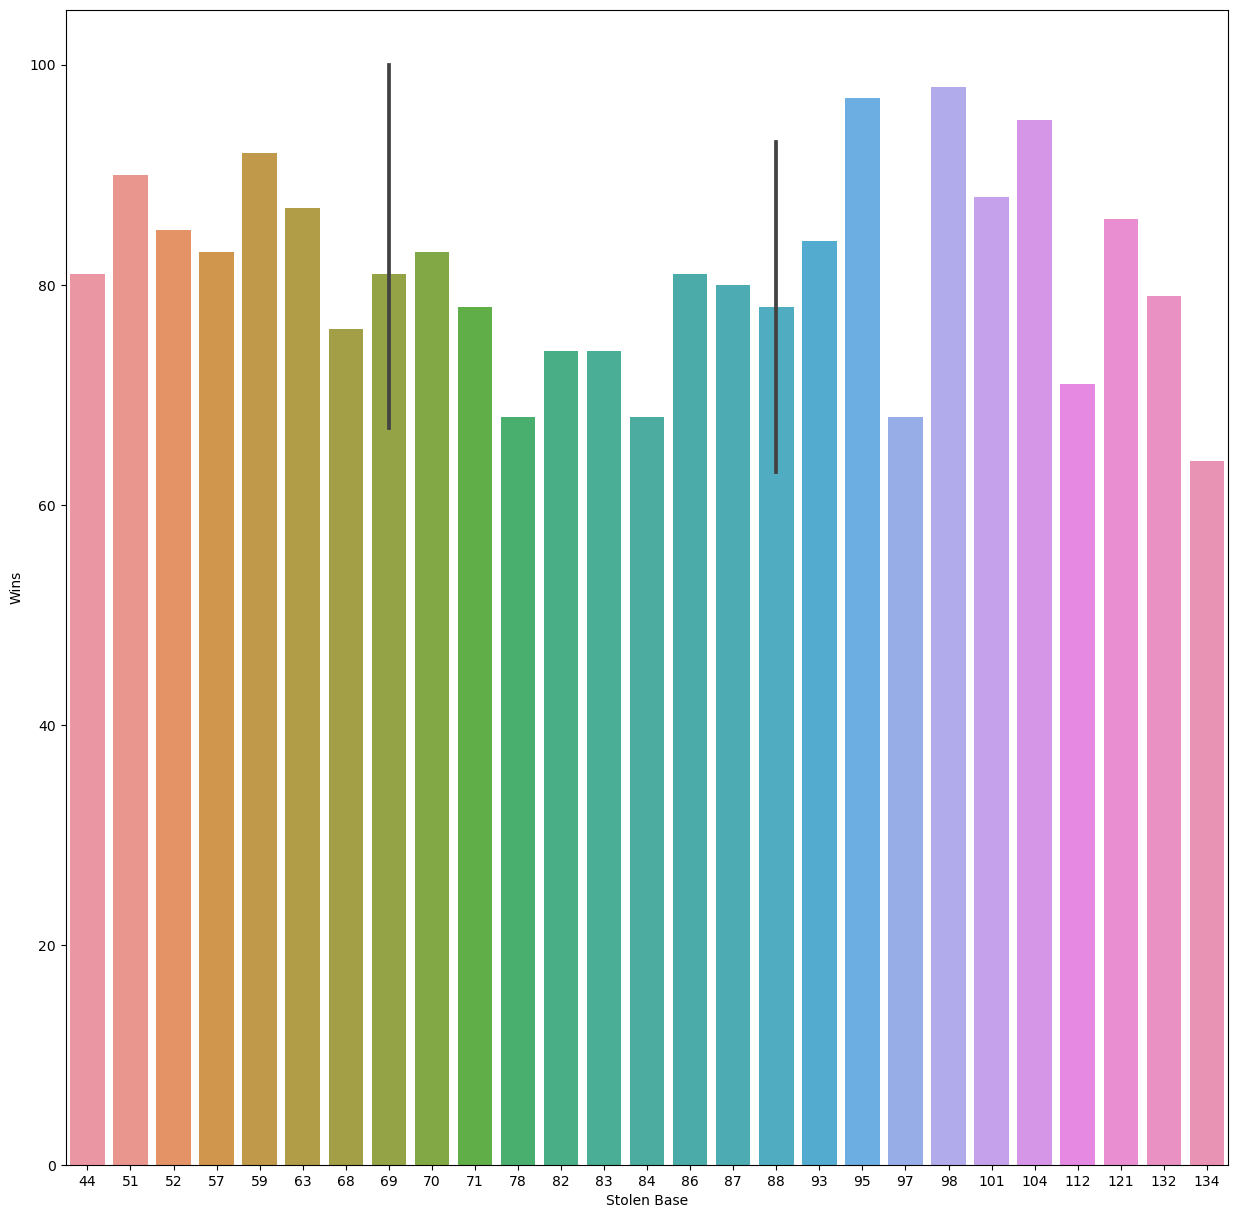

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

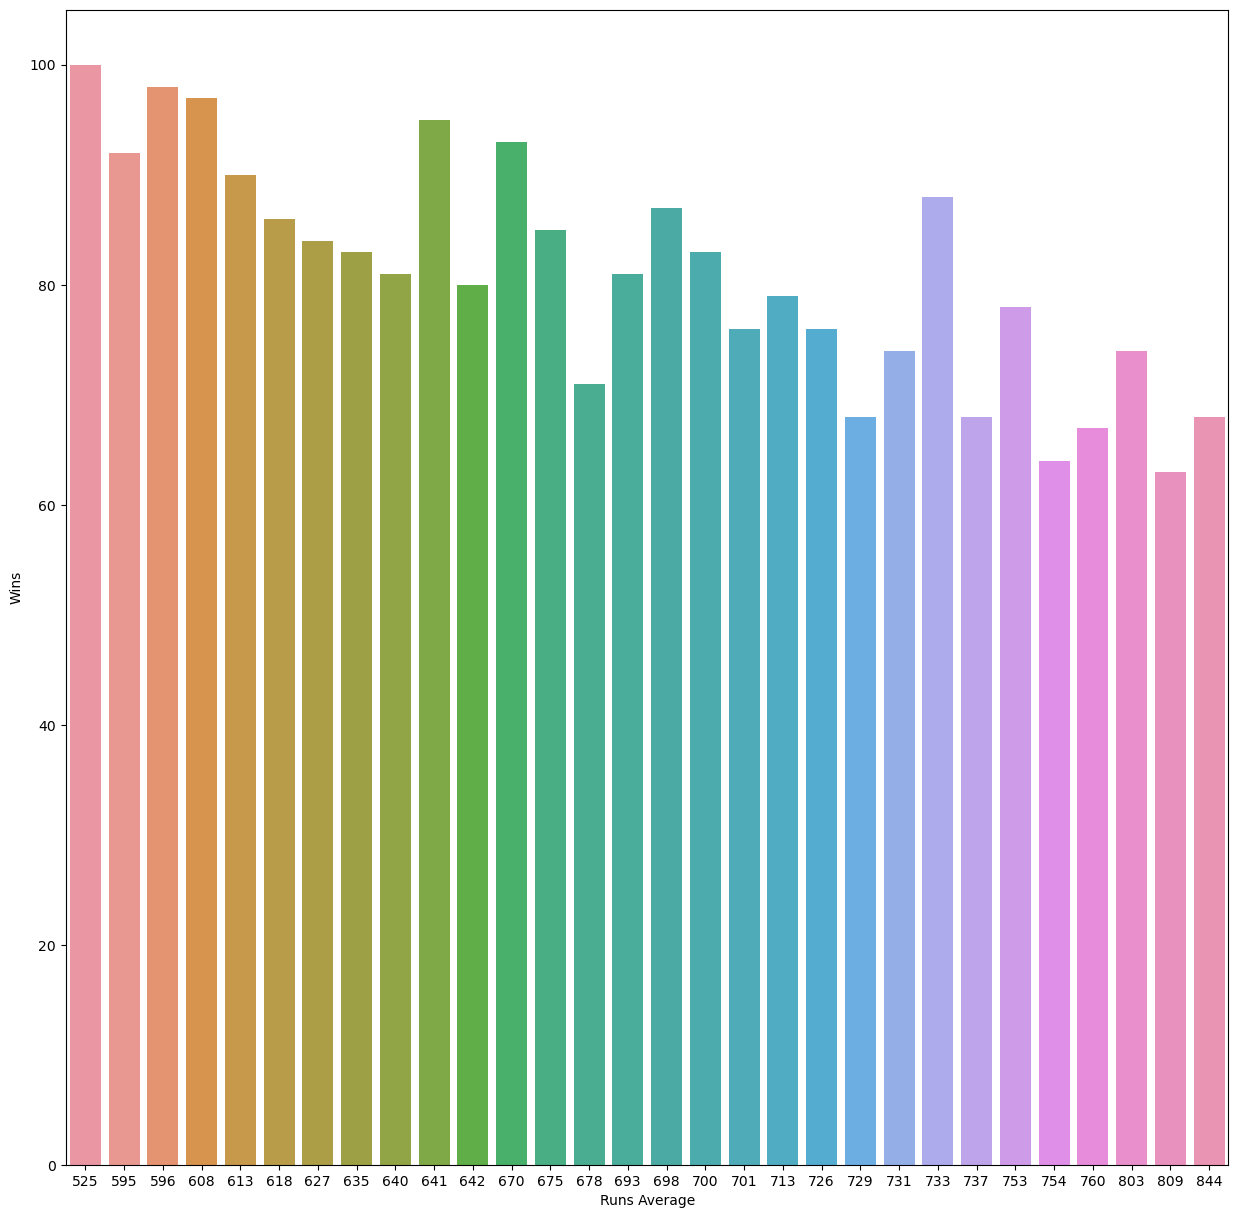

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

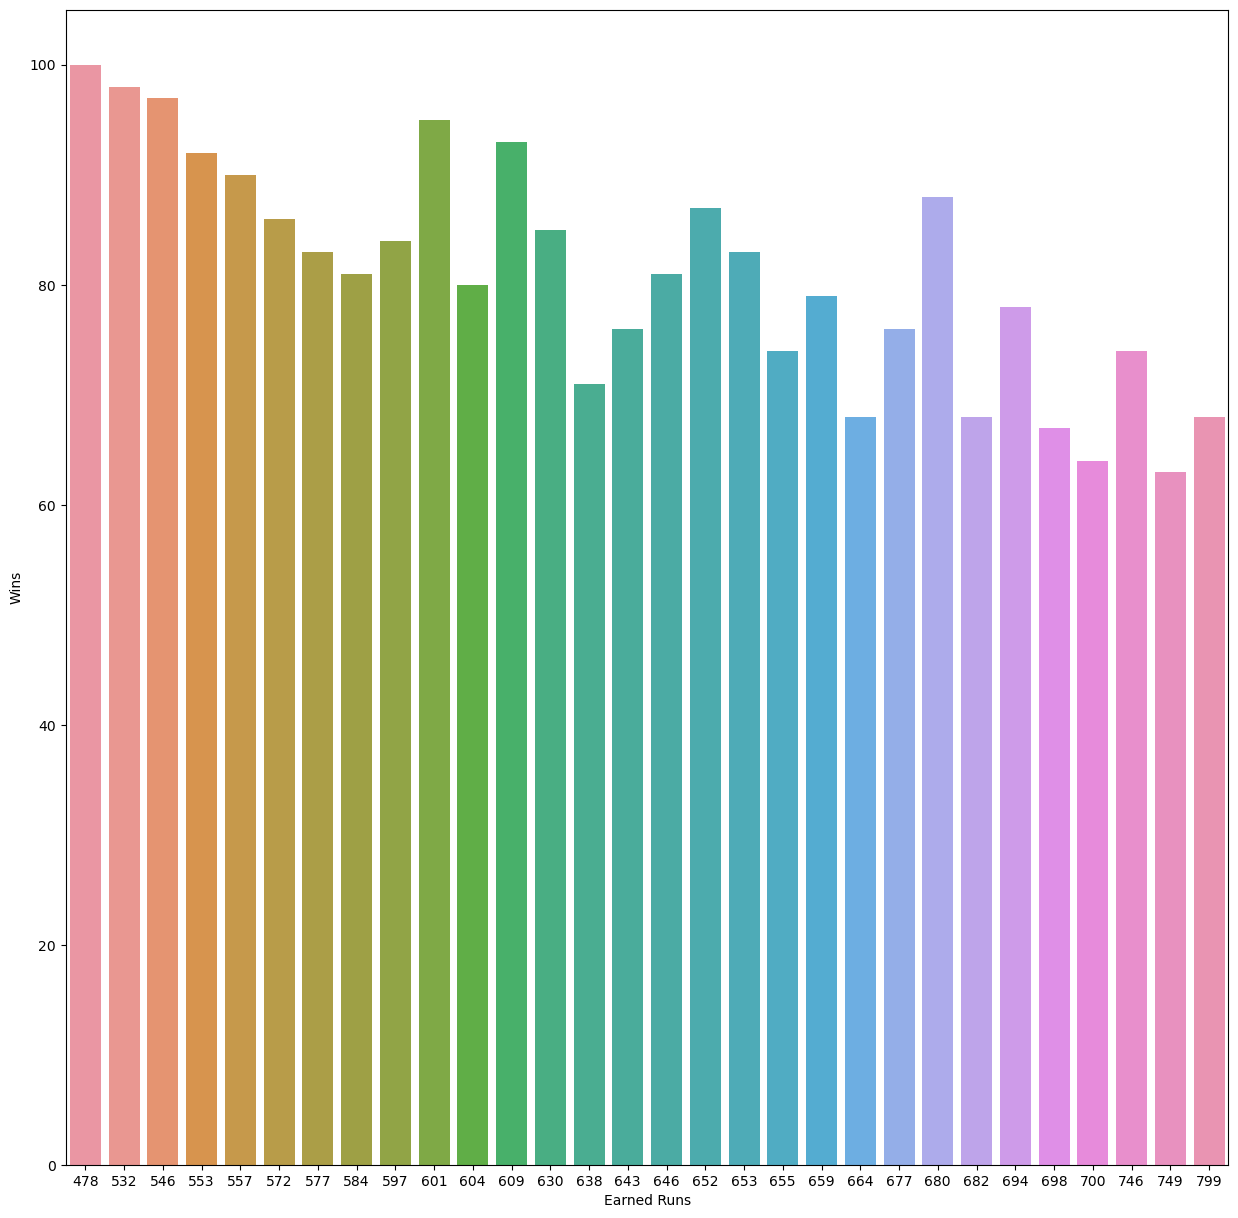

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

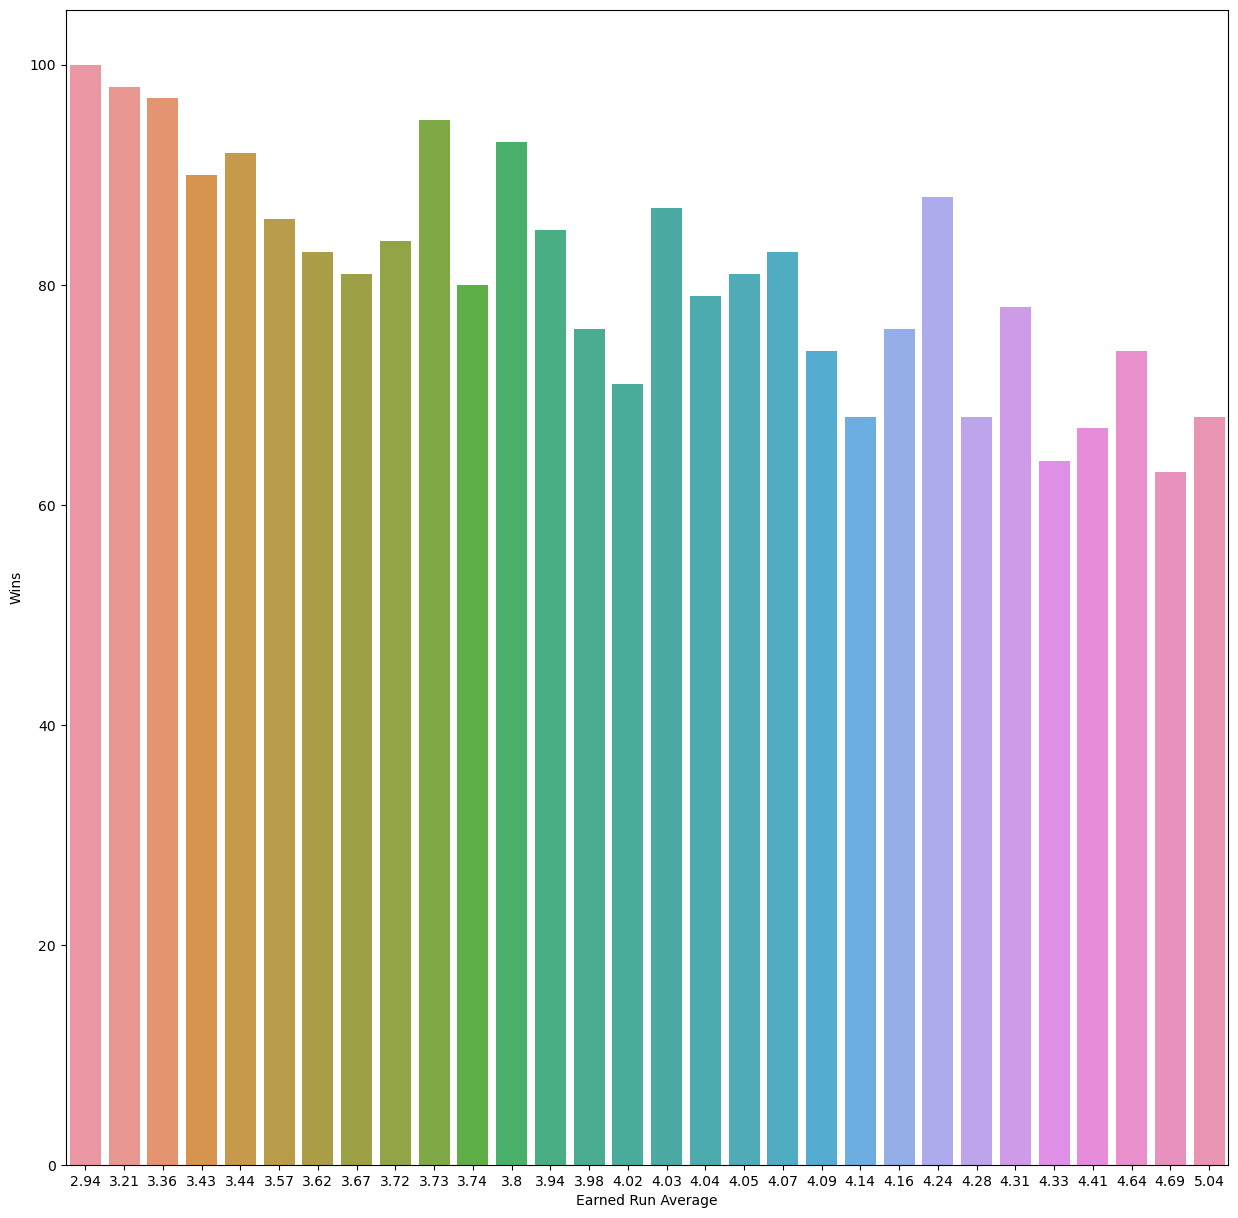

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

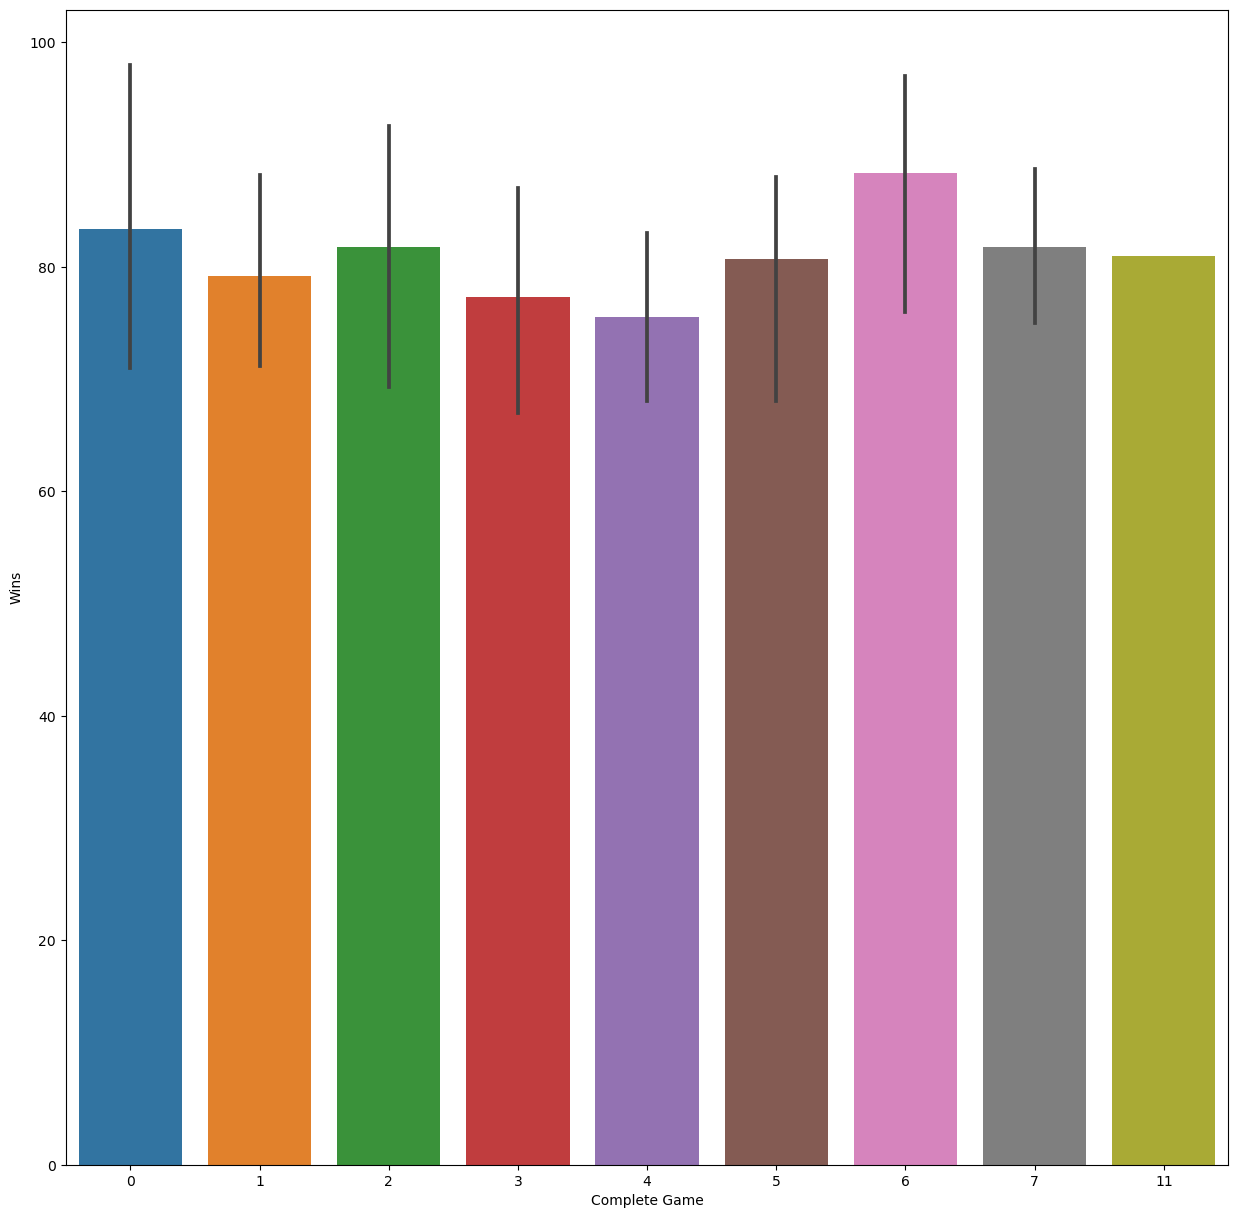

In [31]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

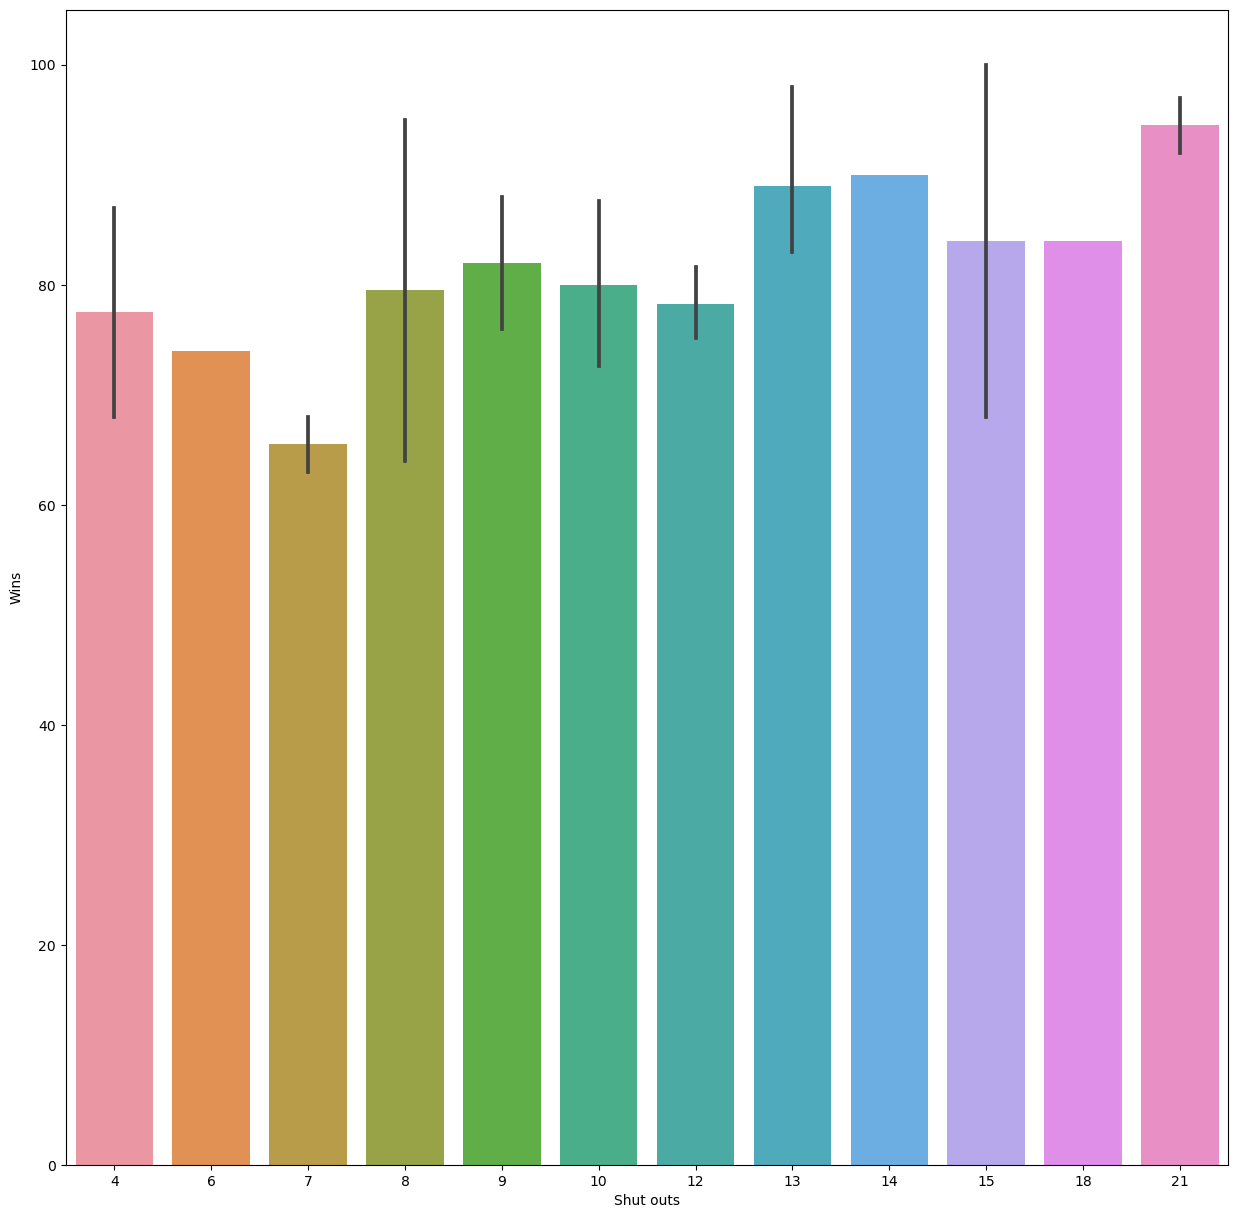

In [32]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut outs", y="Wins", data=df)
plt.show()

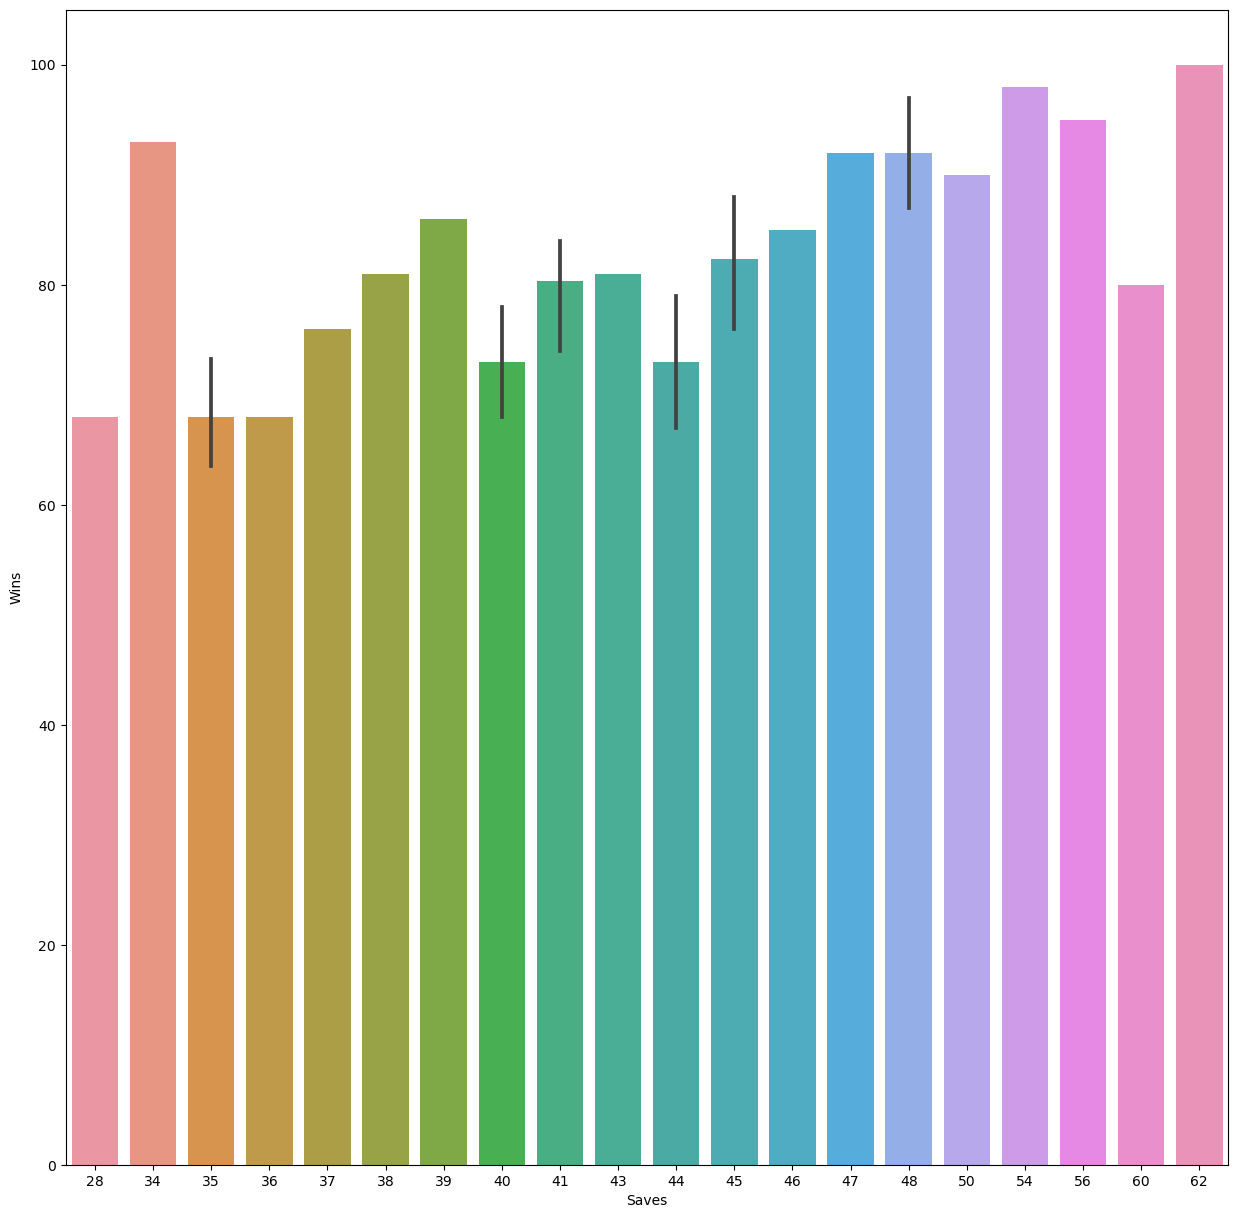

In [33]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

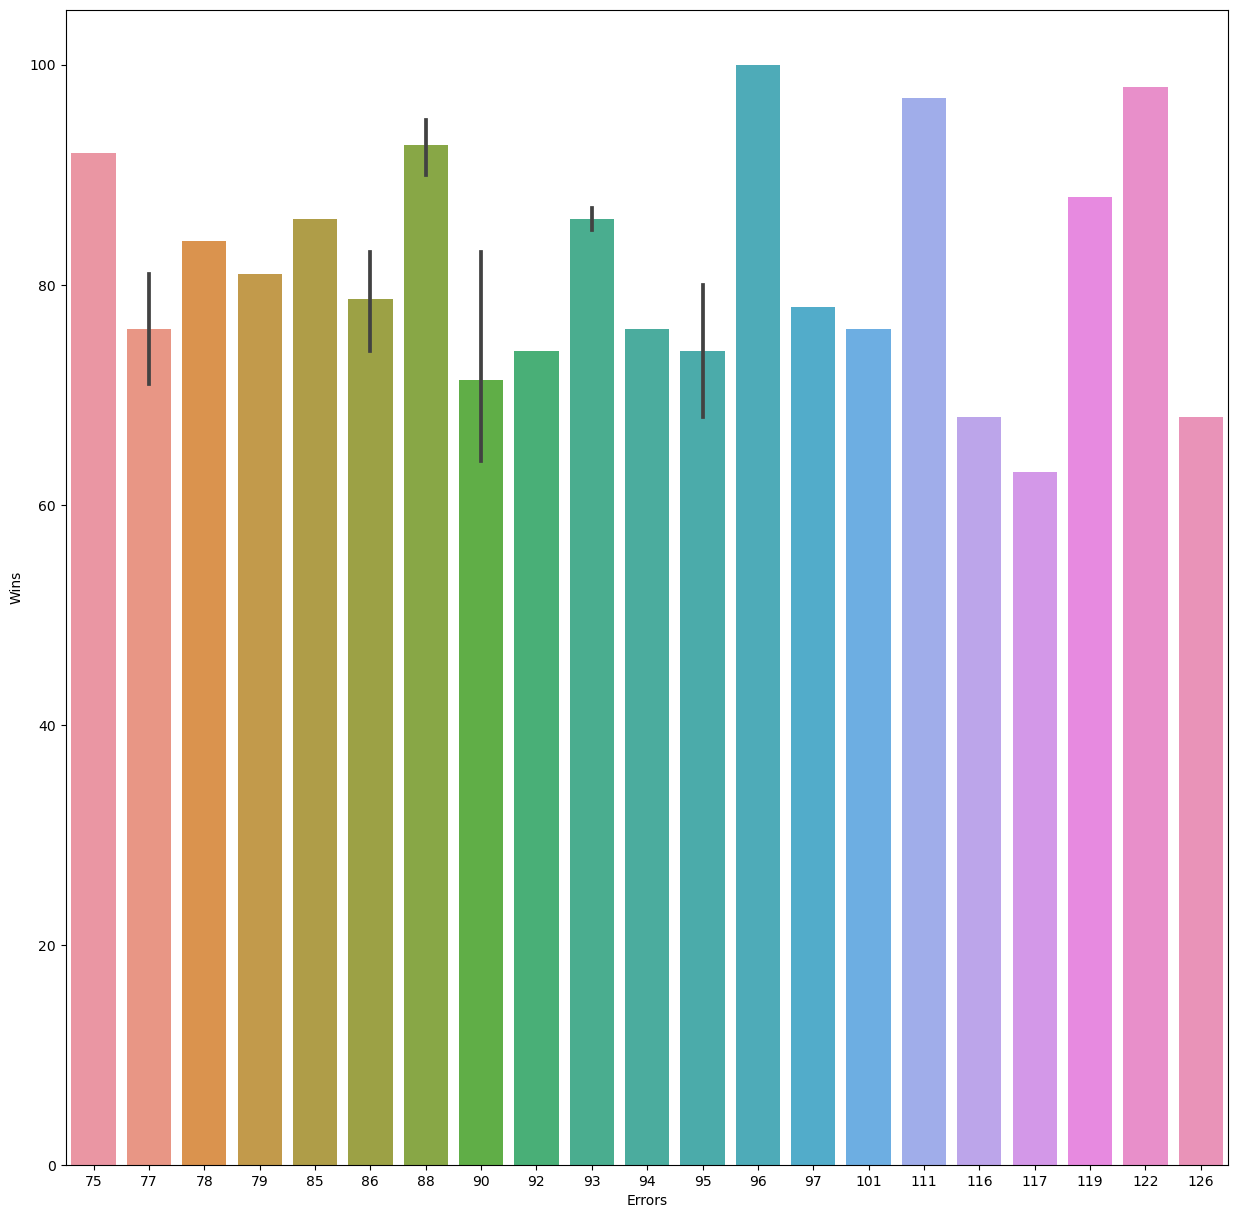

In [34]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

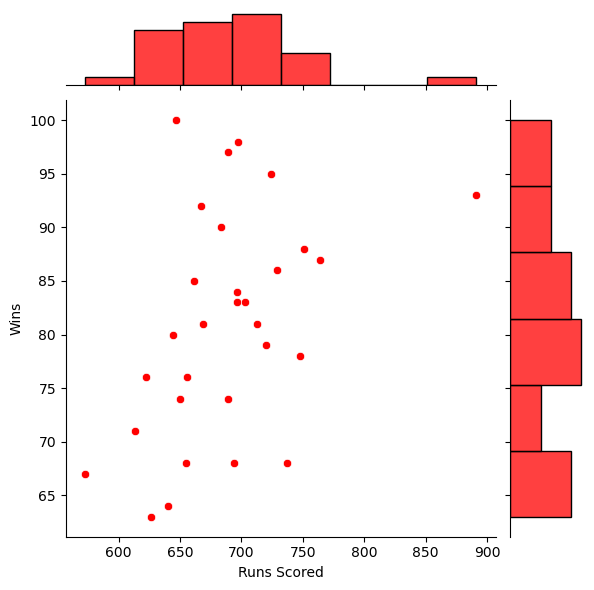

In [35]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="red")

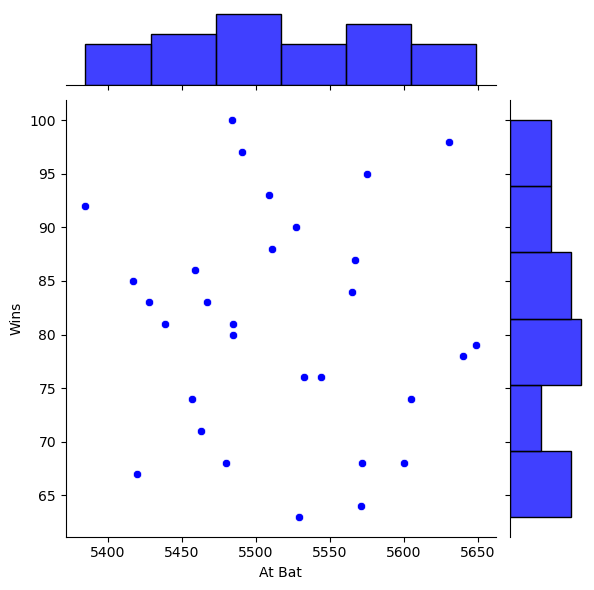

In [36]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="blue")

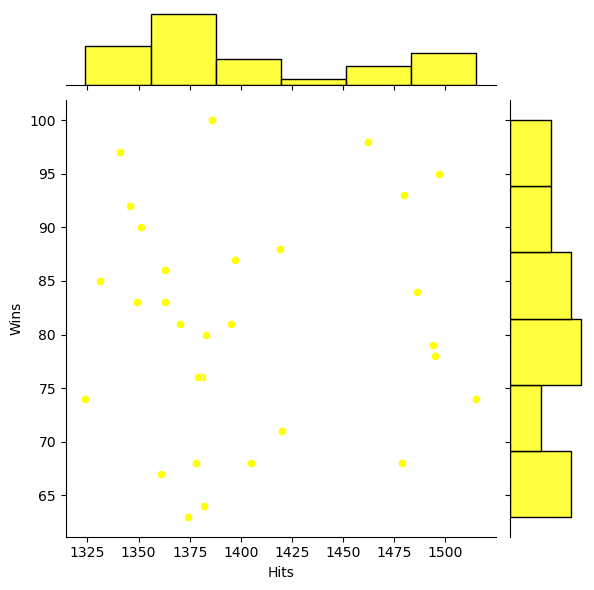

In [37]:
sns.jointplot(x="Hits", y="Wins", data=df, color="yellow")

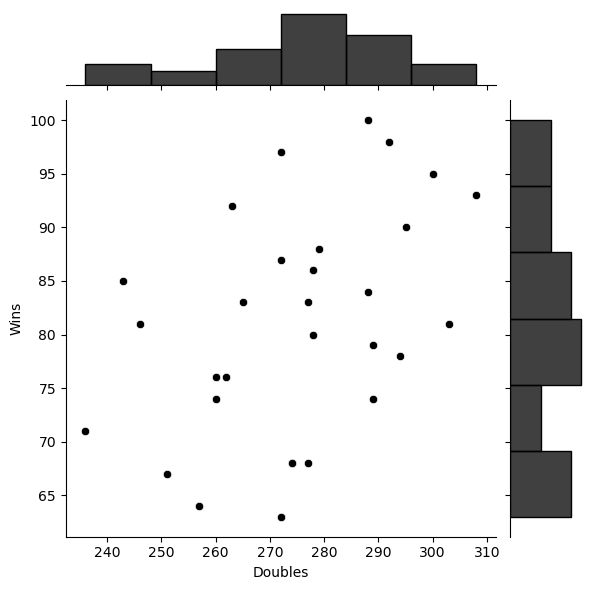

In [38]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="black")

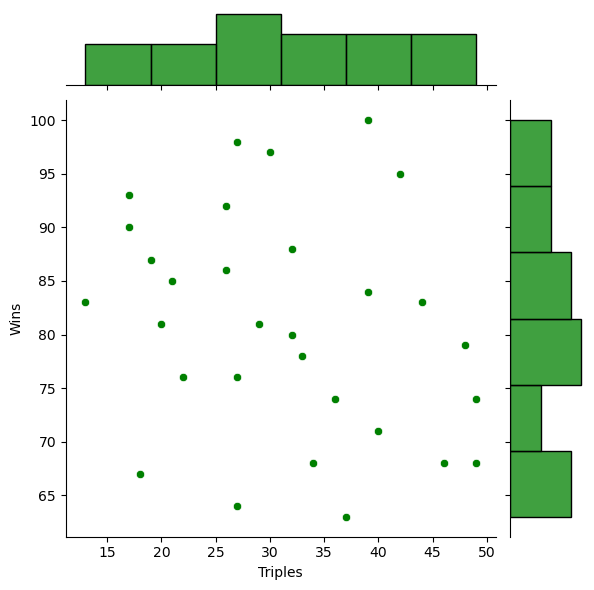

In [39]:
sns.jointplot(x="Triples", y="Wins", data=df, color="green")

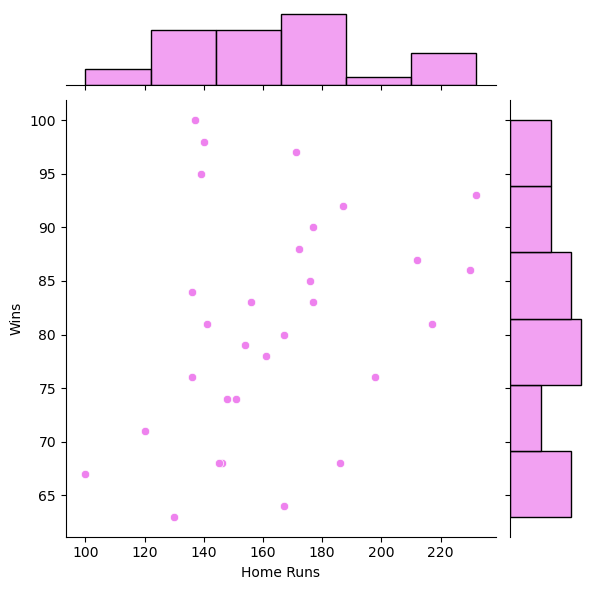

In [40]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="violet")

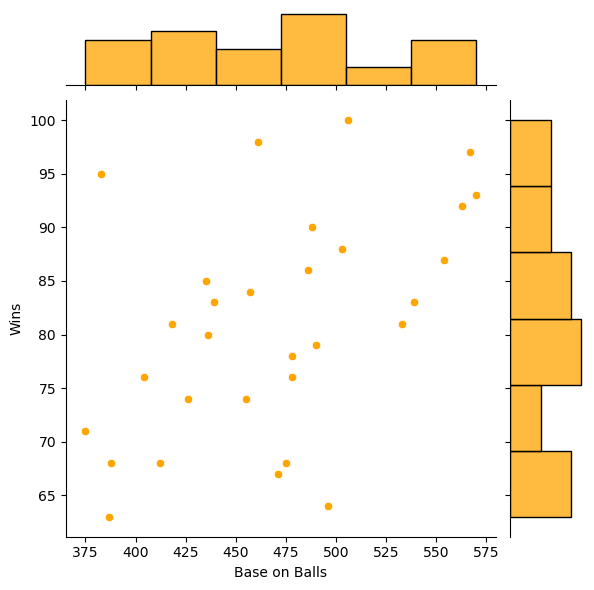

In [41]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="orange")

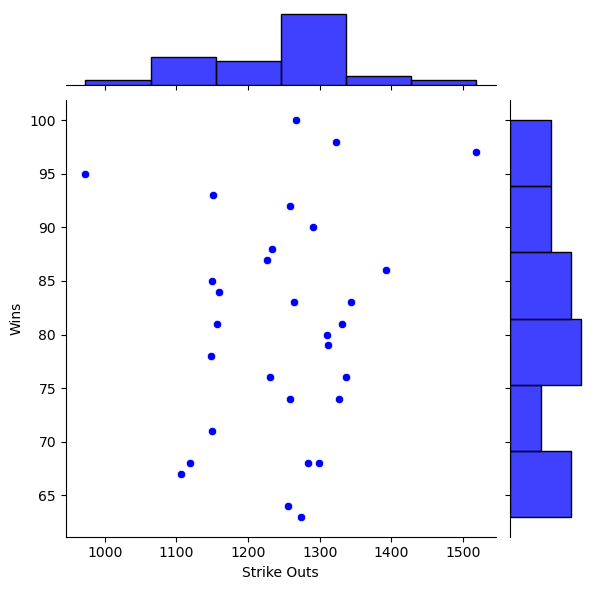

In [42]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="blue")

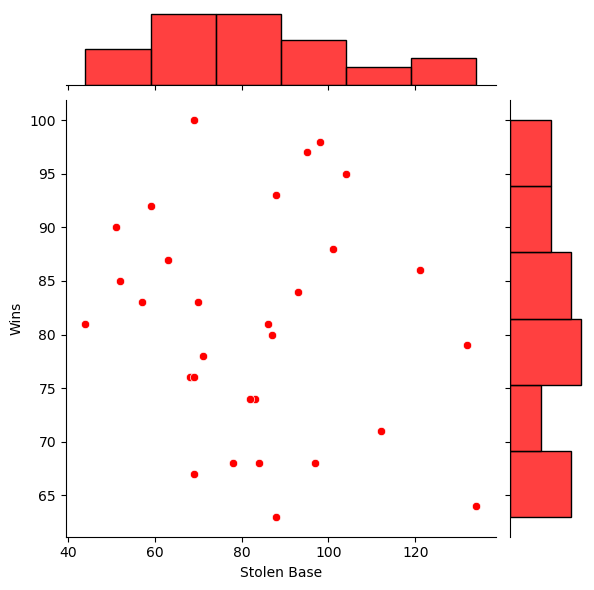

In [43]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="red")

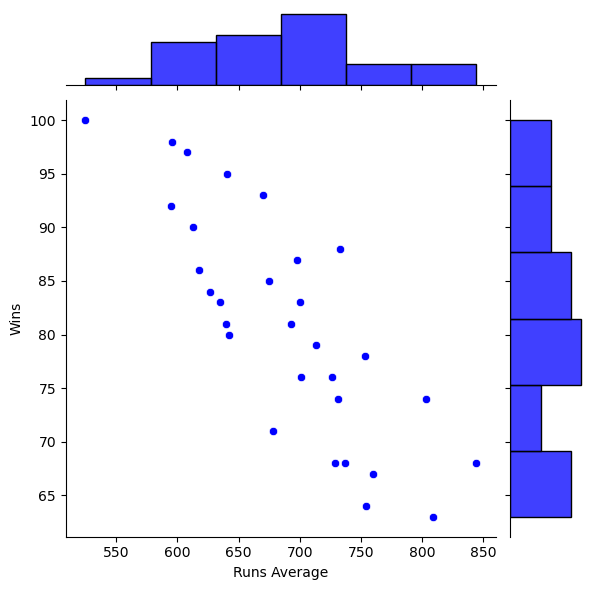

In [44]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="blue")

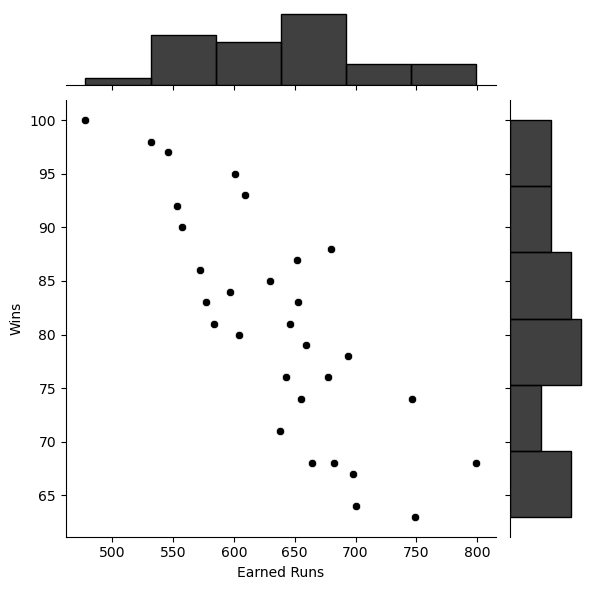

In [45]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="black")

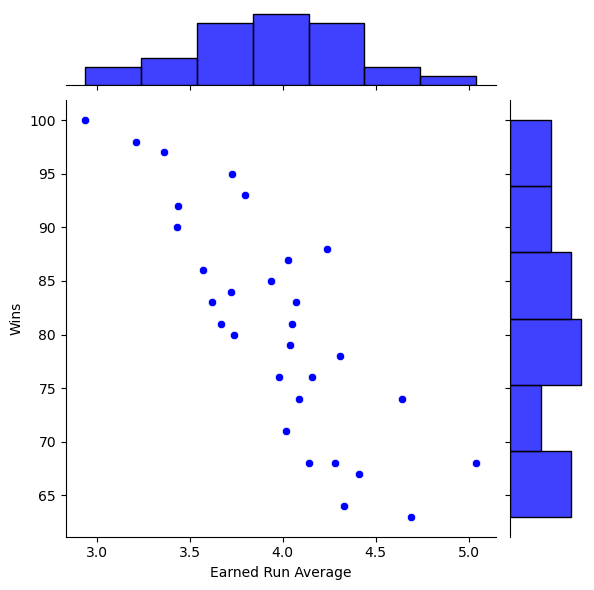

In [46]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="blue")

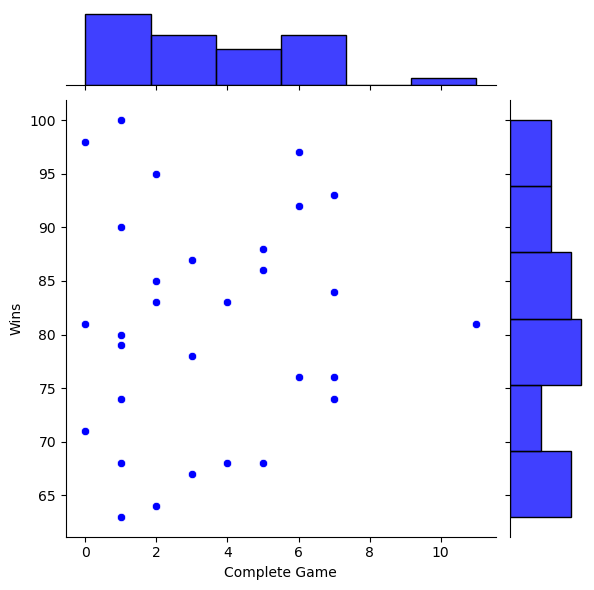

In [47]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="blue")

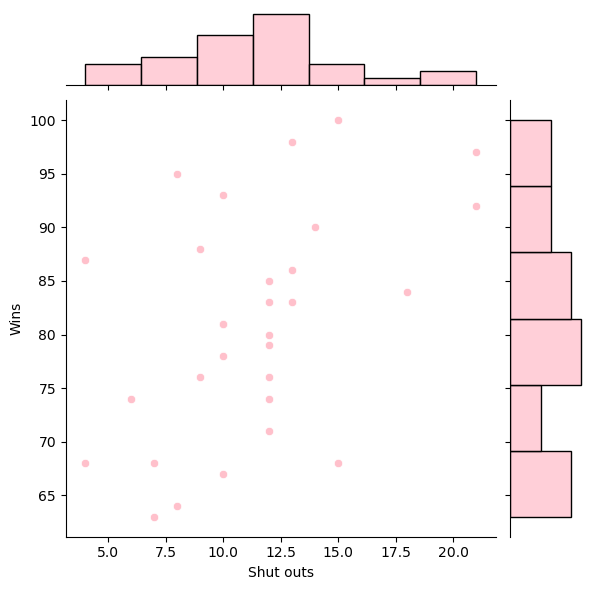

In [48]:
sns.jointplot(x="Shut outs", y="Wins", data=df, color="pink")

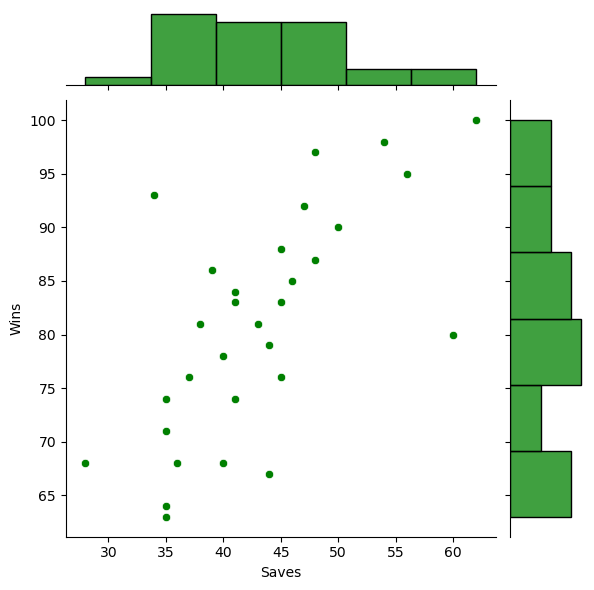

In [49]:
sns.jointplot(x="Saves", y="Wins", data=df, color="green")

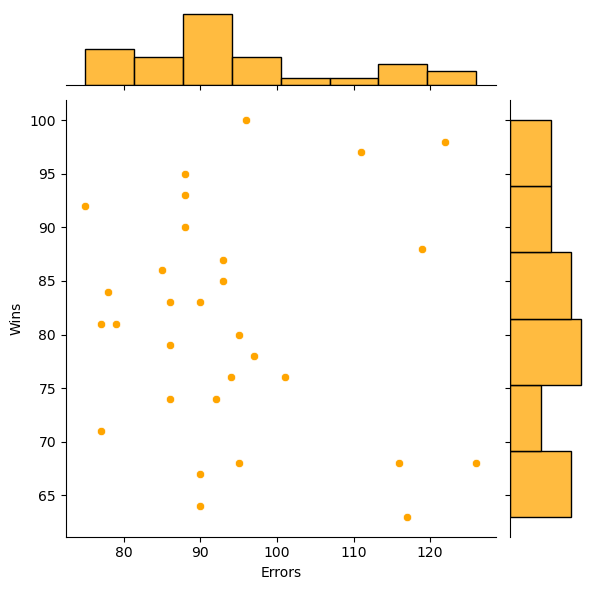

In [50]:
sns.jointplot(x="Errors", y="Wins", data=df, color="orange")

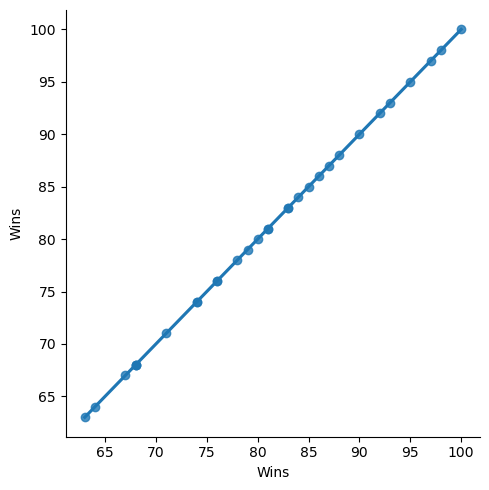

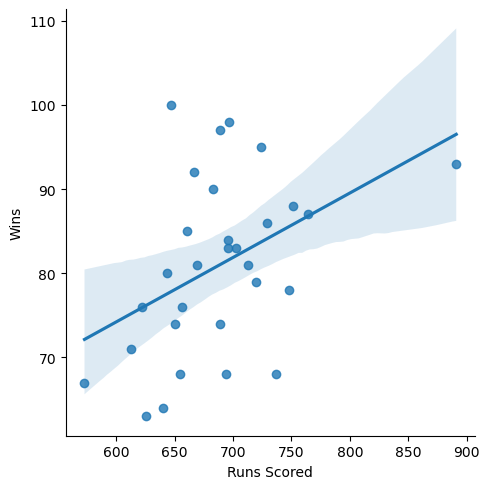

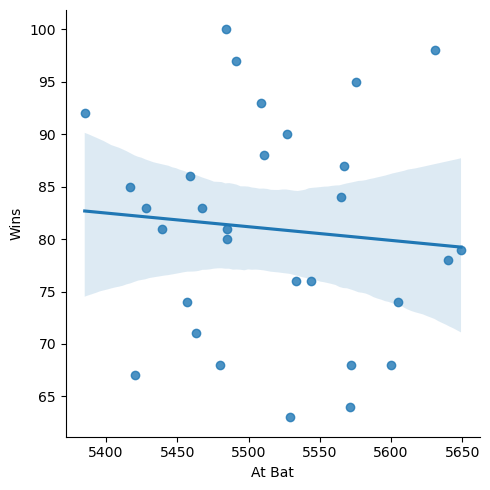

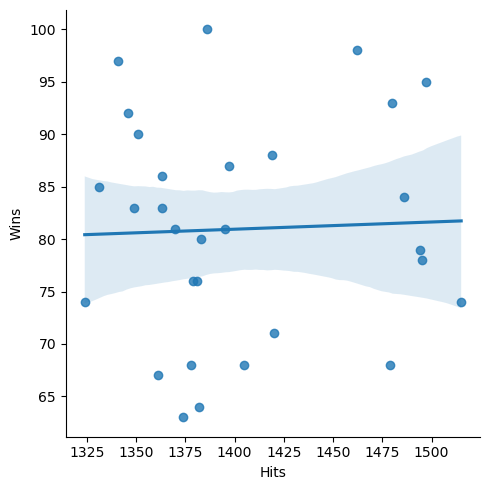

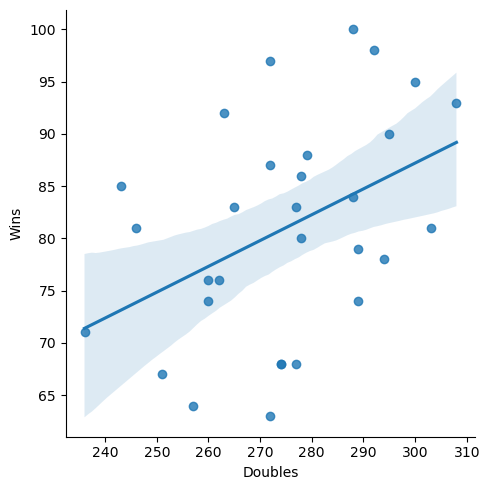

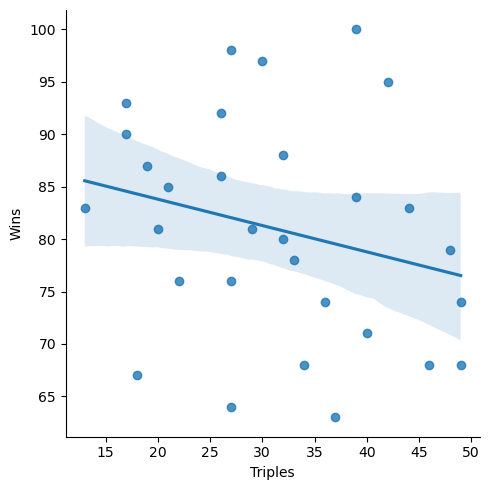

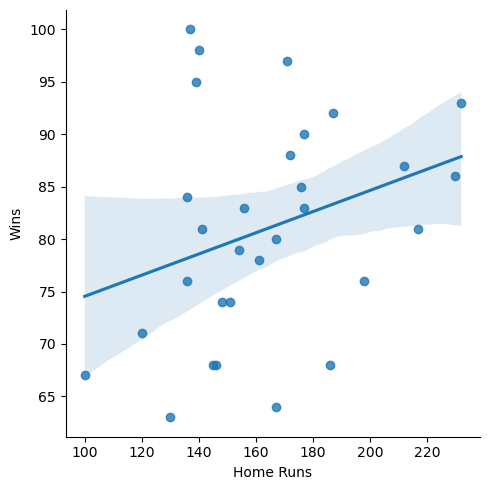

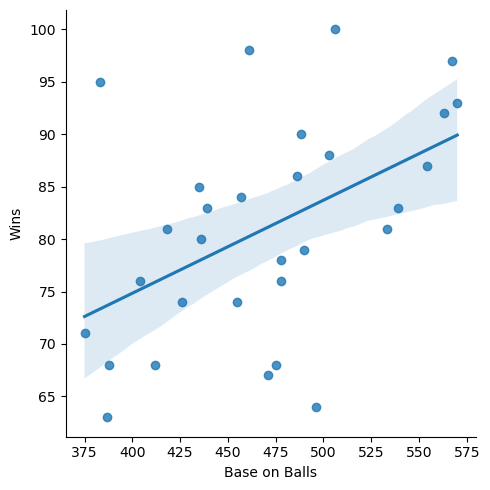

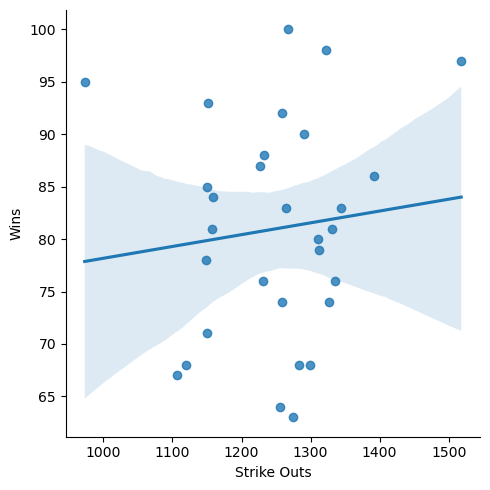

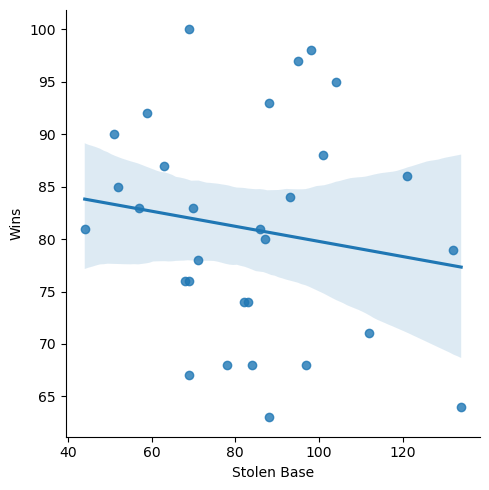

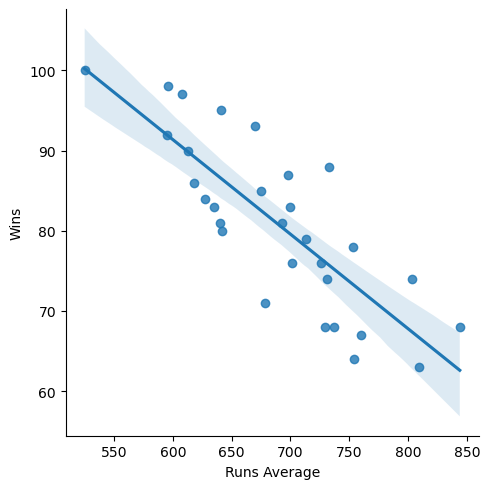

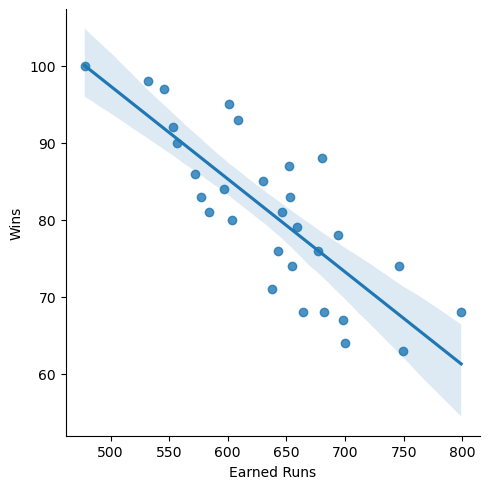

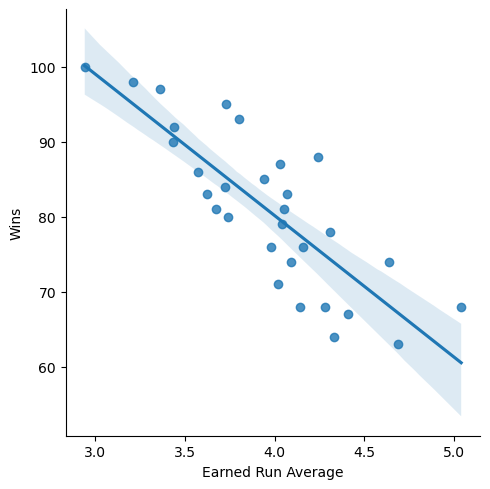

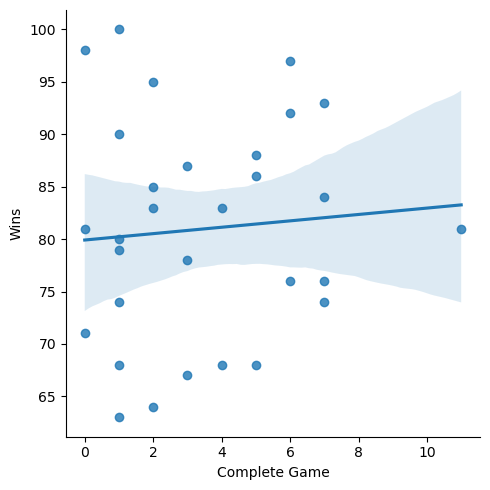

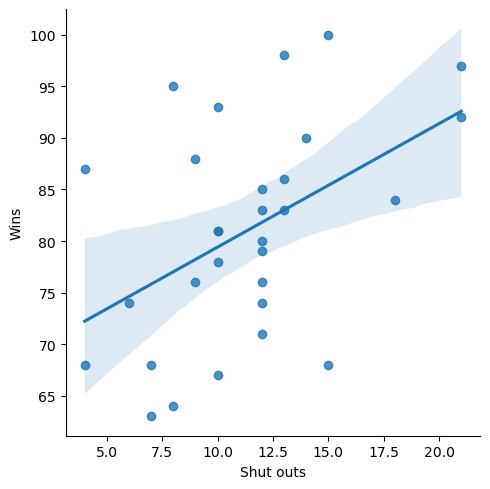

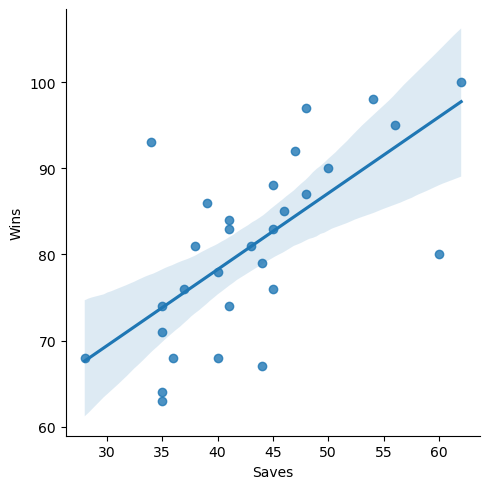

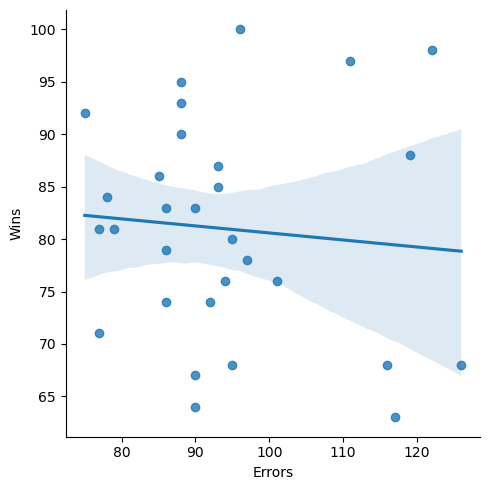

In [51]:
for i in df:
    sns.lmplot(x=i, y="Wins", data=df)

# MULTIVARIATE ANALYSIS

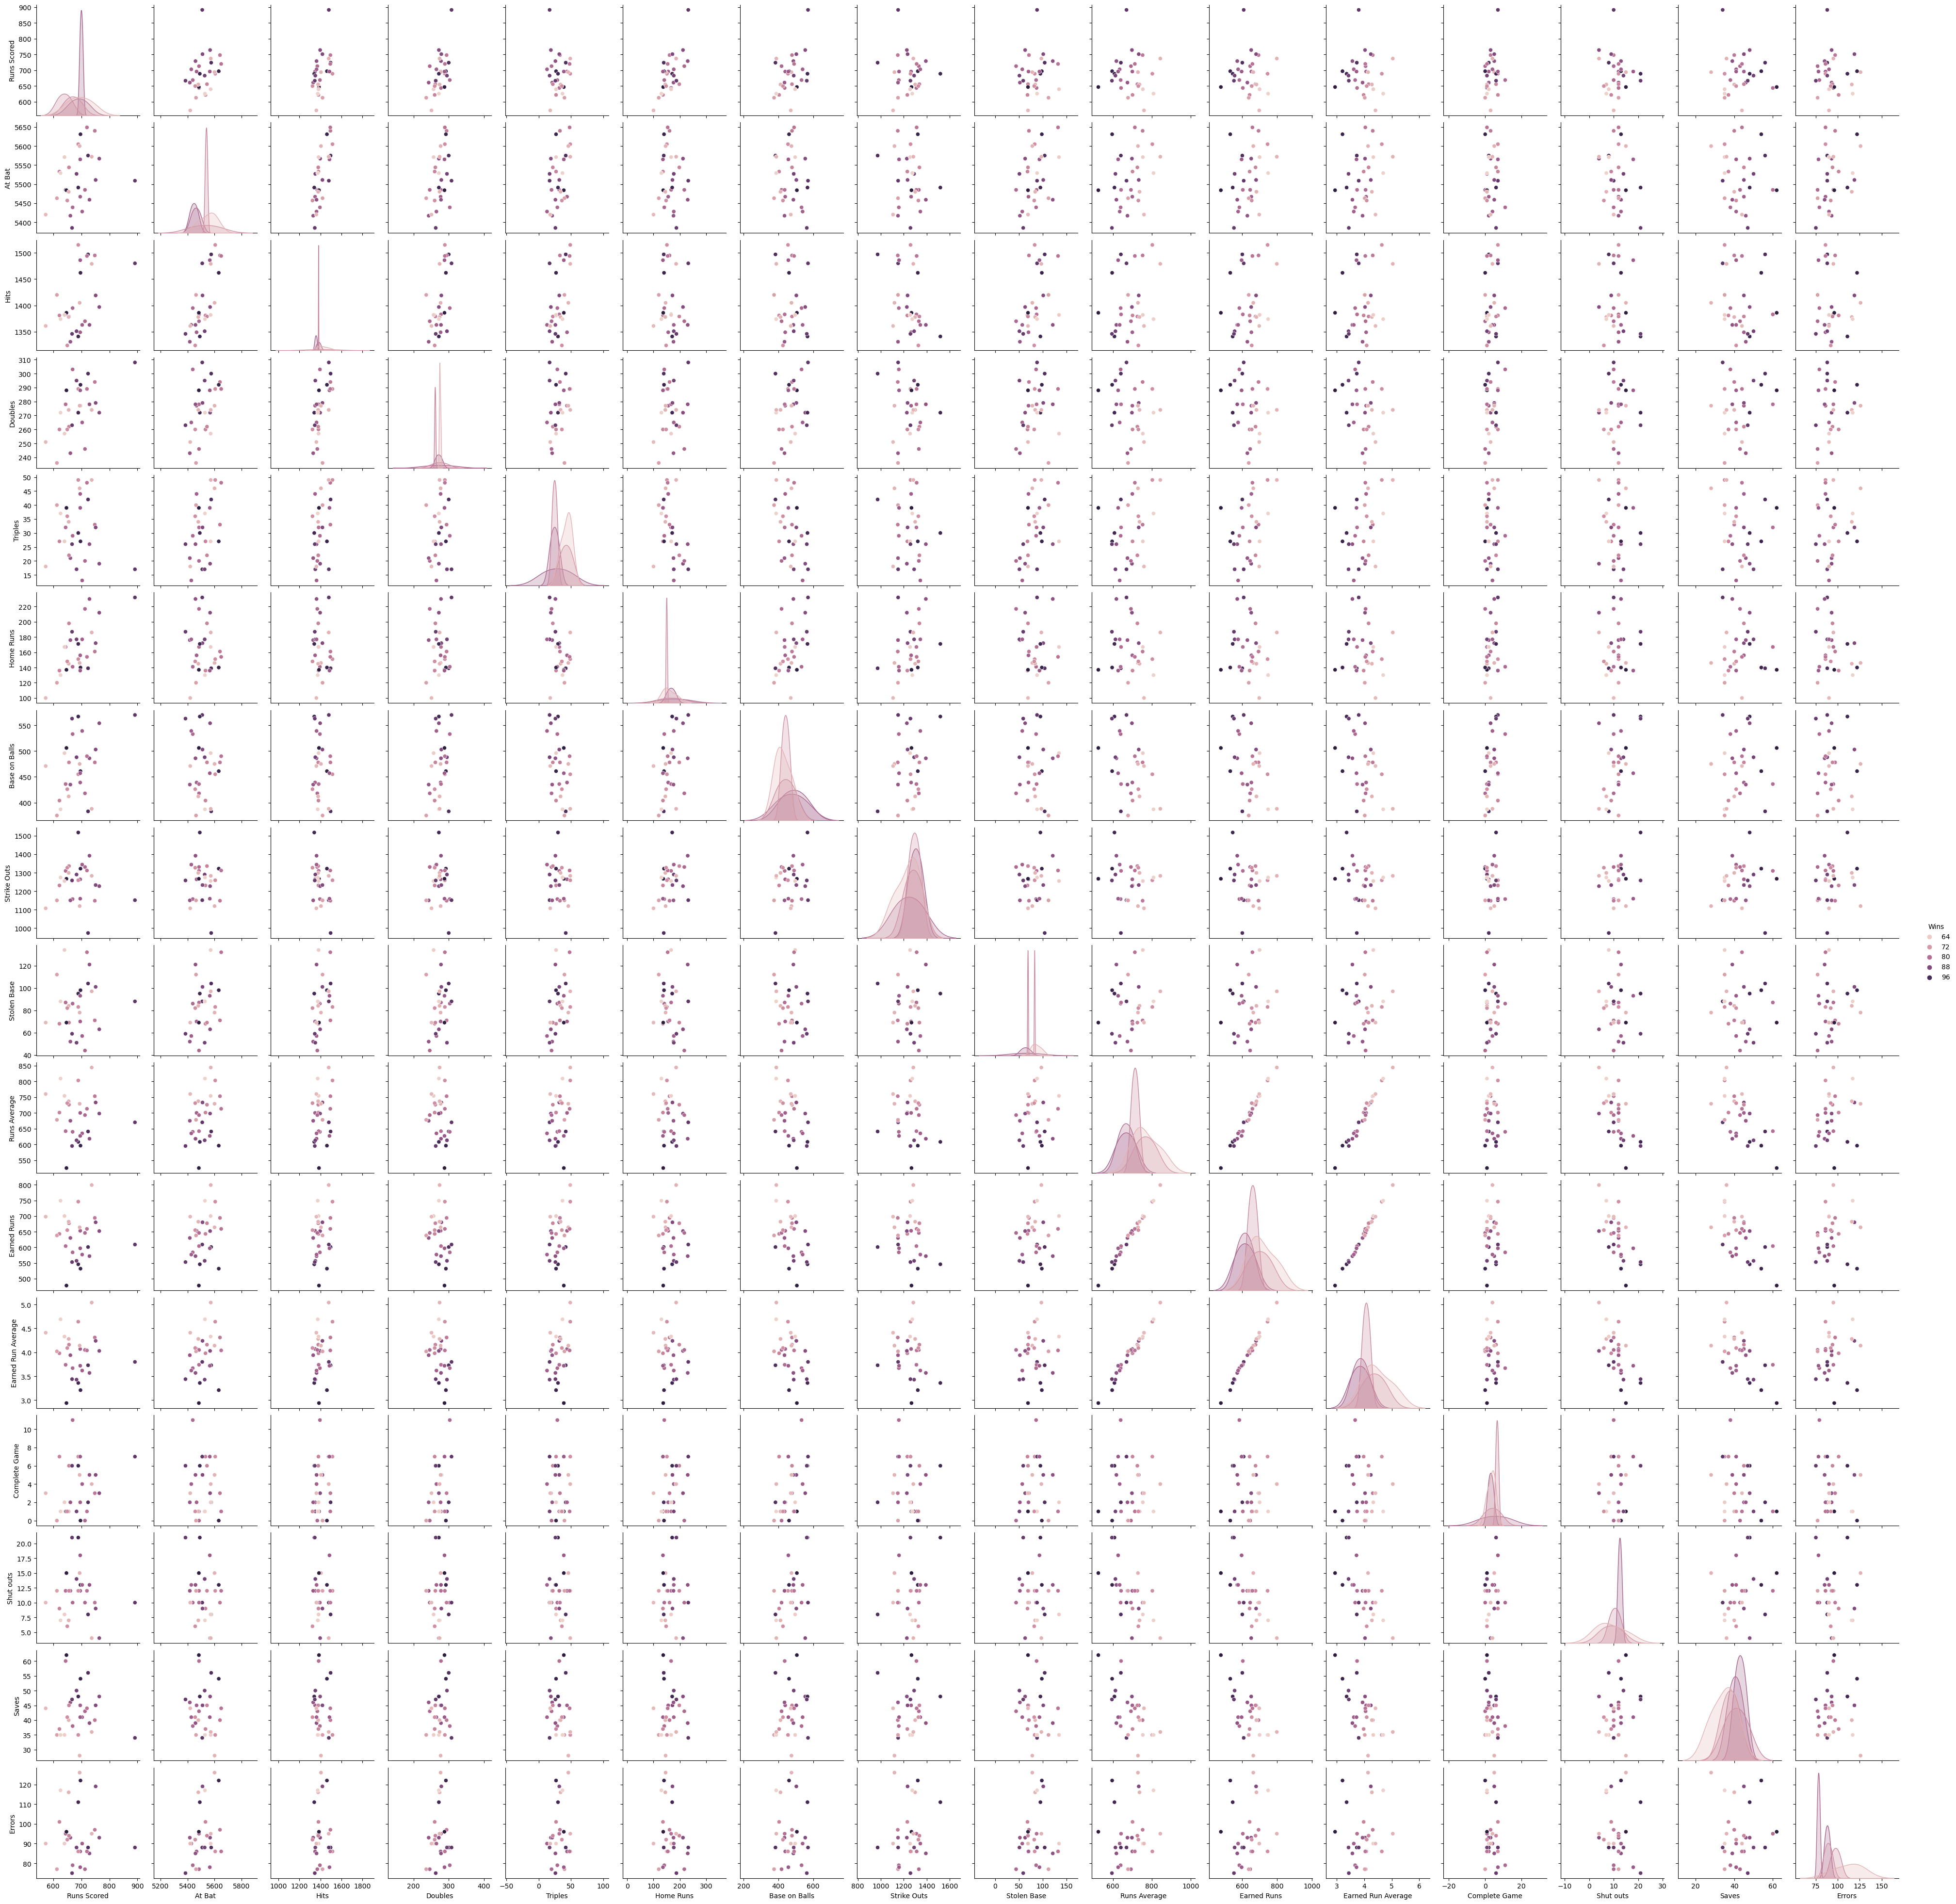

In [52]:
sns.pairplot(df, hue="Wins")

In [53]:
df=df.drop(["Earned Runs", "Earned Run Average"], axis=1)

Droping these 2 columns as these are not related with our our label columns i.e, "Wins".

# OUTLIER REMOVAL USING Z SCORE

In [54]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers is : ",df.shape)
print("Shape of the dataframe after removing outliers is : ",df1.shape)
print("The %AGE of data lost after removing outlier is : ",(df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers is :  (30, 15)
Shape of the dataframe after removing outliers is :  (29, 15)
The %AGE of data lost after removing outlier is :  3.3333333333333335


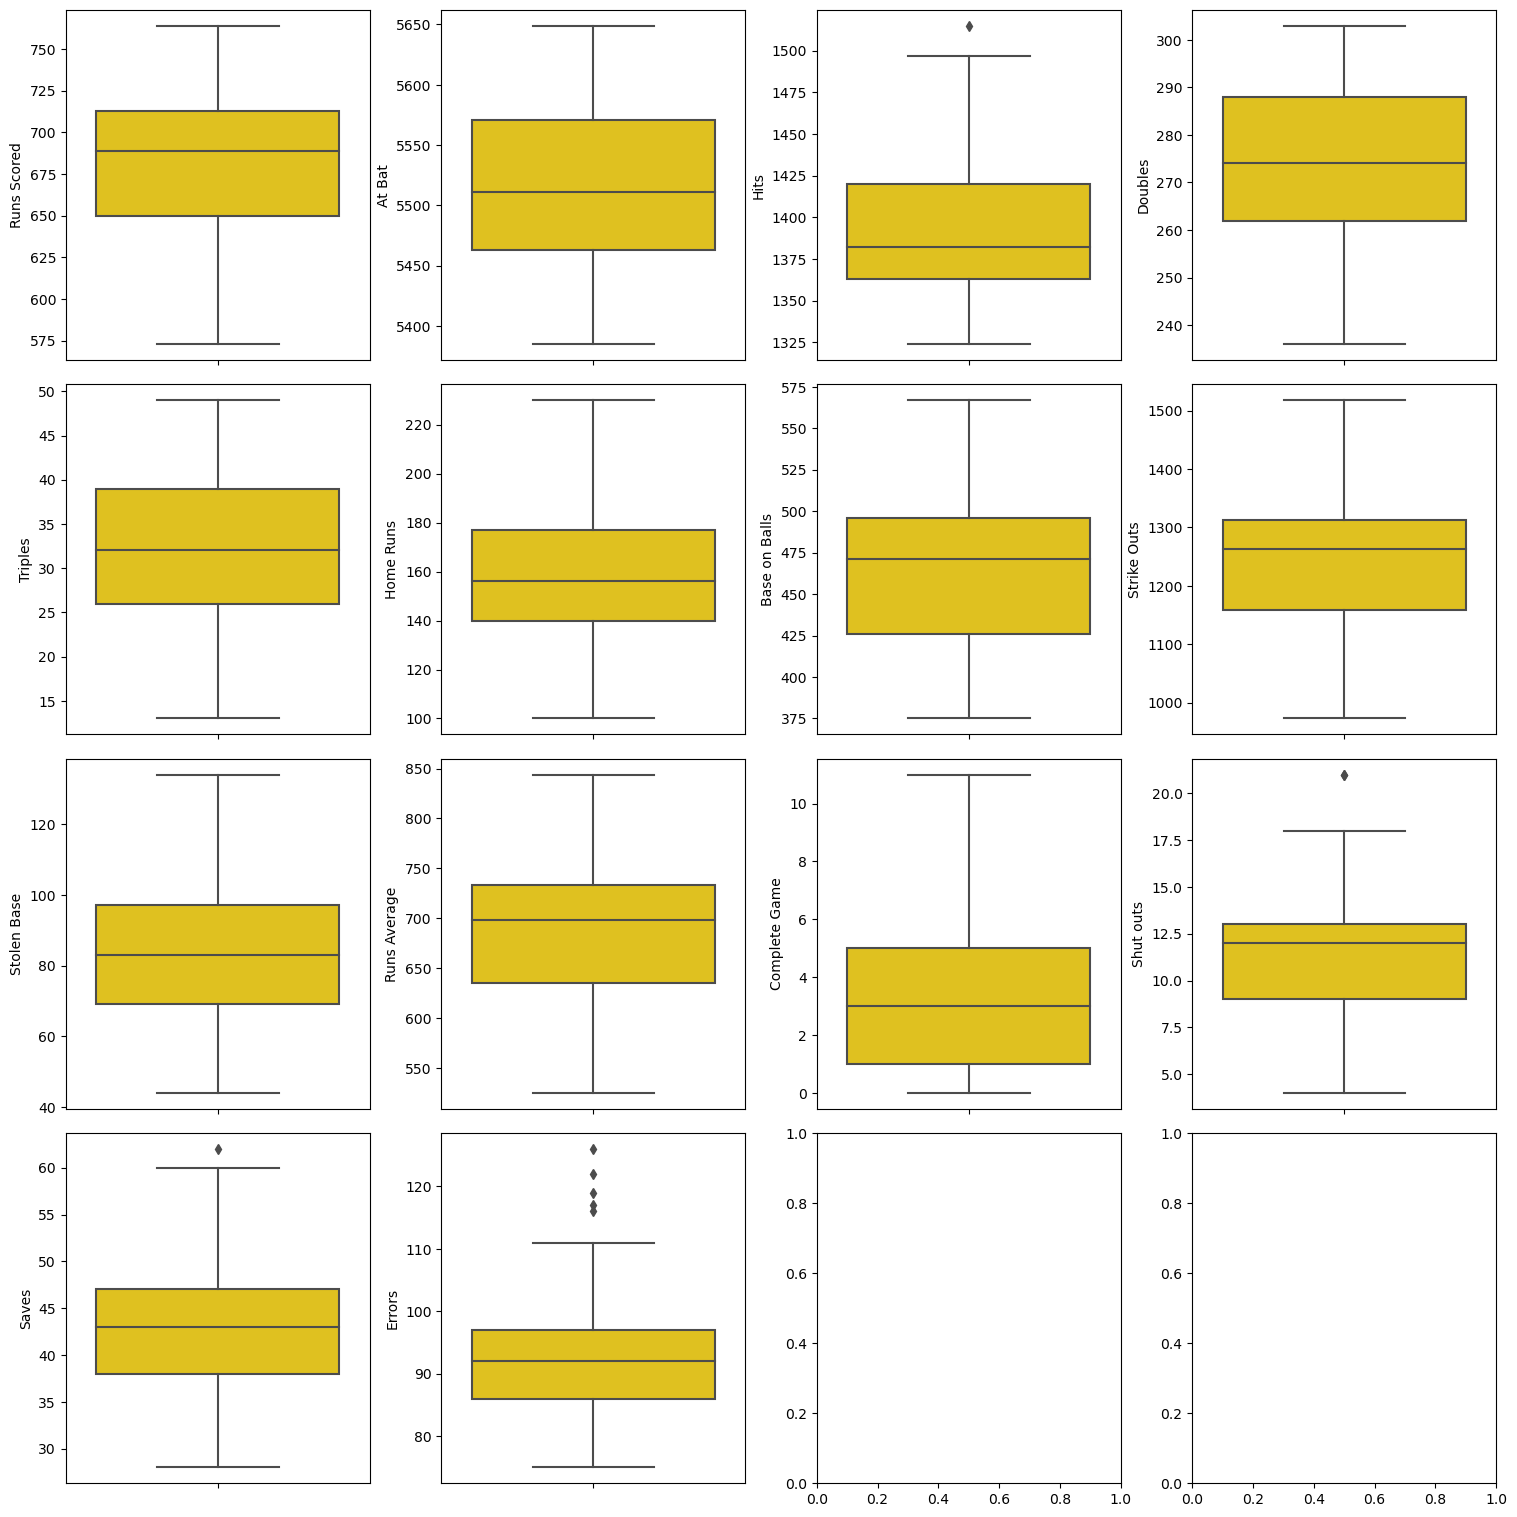

In [55]:
fig, ax=plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index=0
features=df.drop("Wins",axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index+=1
    plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [56]:
df.skew()

Wins             0.119013
Runs Scored     -0.215364
At Bat           0.169573
Hits             0.783772
Doubles         -0.335304
Triples          0.090124
Home Runs        0.450862
Base on Balls    0.151193
Strike Outs     -0.233815
Stolen Base      0.494966
Runs Average     0.018155
Complete Game    0.854980
Shut outs        0.526943
Saves            0.627480
Errors           0.840271
dtype: float64

Slight skewness is still present in the dataset.

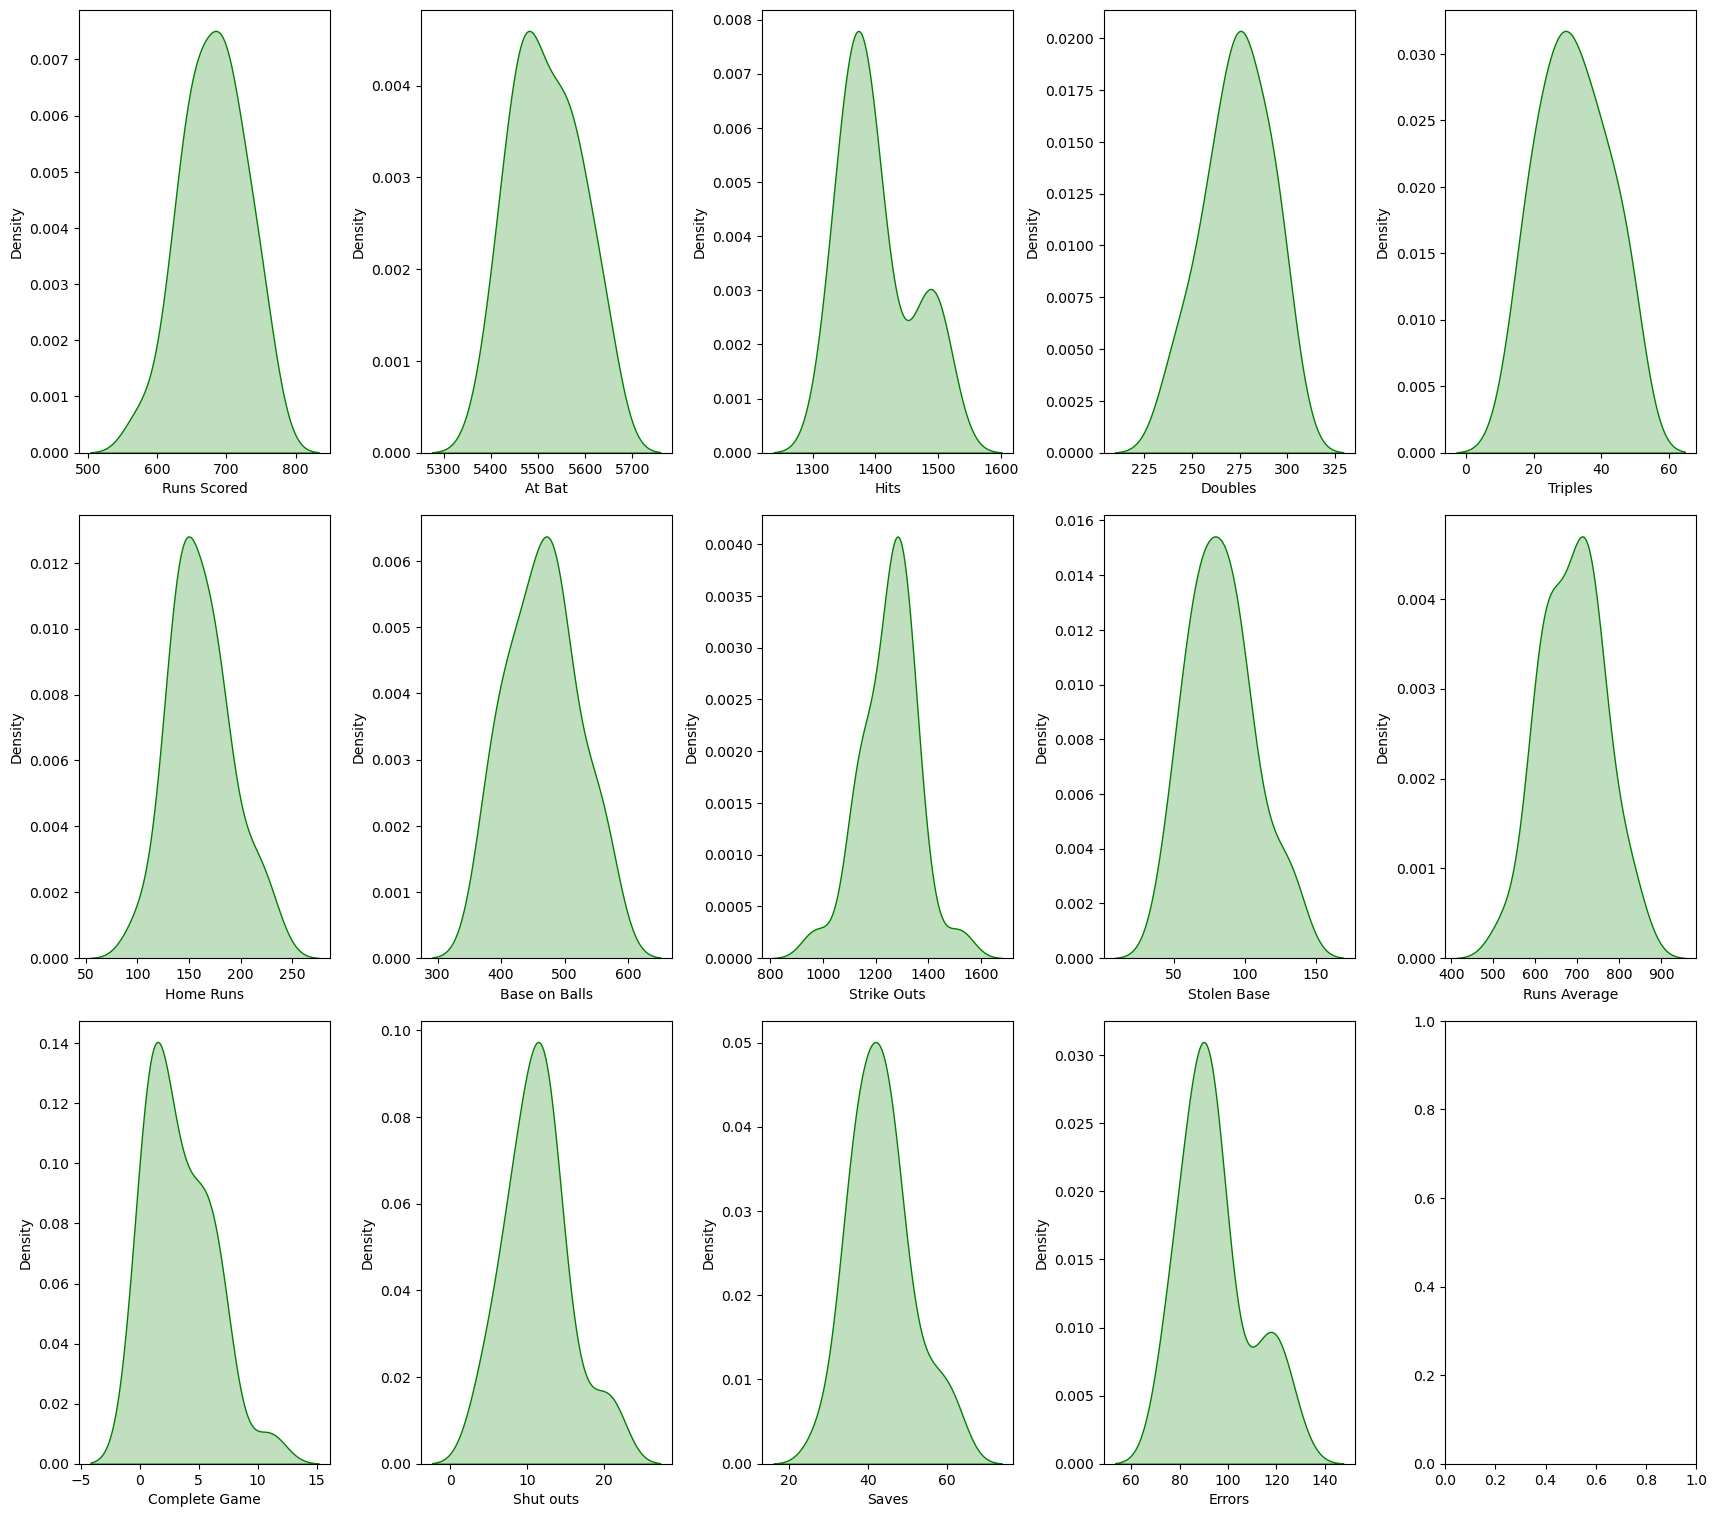

In [57]:
fig, ax=plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index=0
features=df.drop("Wins",axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade":True})
    index+=1
    plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# SPLITTING THE DATASET INTO 2 VARIABLES NAMELY X AND Y FOR FEATURE AND LABEL

In [58]:
X=df.drop('Wins', axis=1)
Y=df['Wins']

# FEATURE SCALING

In [59]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0     0.959398  0.830084  1.738306  1.556538  1.010845  -0.765863   
1     0.331147 -0.702831 -0.938698  0.201171  1.208917  -0.181389   
2    -0.274666 -1.100253 -0.106656  1.733325 -0.276617  -0.697101   
3    -1.329231  0.233951 -0.359886 -0.800621 -0.474688  -0.869006   
4     0.174084  1.255894  2.063888  0.908319  1.704094  -0.353293   
5     1.856900  0.716535 -0.070480 -0.093474 -1.266972   1.743939   
6     0.712585 -0.447345 -0.558853 -1.625627 -1.167936   1.915843   
7    -0.835605 -0.447345 -0.323710  0.260100  0.020490   0.196801   
8     1.497899  1.752672  1.702131  1.202964  0.119526  -0.009484   
9     1.565212 -0.078310  0.327453  0.319029  0.020490   0.368705   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0      -1.536359    -2.727623     0.905953     -0.664514      -0.501486   
1      -0.495021     0.121896    -0.585315      0.154638      -0.501486   
2       1.252941    -0.925866     0.116458     -0.678397       2.854612   
3      -1.145857    -0.201246    -0.673037      0.168522       1.363013   
4      -0.197495     0.072935    -0.015124      1.584683       1.363013   
5       1.643442    -0.240414    -0.892341      0.126870      -0.128586   
6      -0.885522     0.777970    -1.725697      0.057451      -1.247285   
7      -0.550807     0.572335     0.160319     -0.650630      -0.874386   
8       0.230197    -1.013995    -0.541454      0.890486      -0.128586   
9       0.695081    -0.181661     0.774370      0.612808       0.617213   

   Shut outs     Saves    Errors  
0  -0.813262  1.643157 -0.471091  
1   0.159299  0.211006 -0.614898  
2  -0.326982 -0.700362 -1.118222  
3  -0.570122 -0.830557  0.463653  
4   0.159299 -1.090948 -0.614898  
5  -1.785822  0.601593 -0.111574  
6  -0.326982 -0.049384 -1.262029  
7   0.159299  2.163939  0.032233  
8  -0.326982 -0.439971  0.176039  
9  -0.570122  0.211006  1.757915

# PRINCIPAL COMPONENT ANALYSIS(PCA)

In [60]:
pca=PCA(n_components=14, svd_solver="full")
X=pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0    -2.957996 -0.953253  2.246316 -1.216994 -2.357314   0.016125   
1     0.240394  0.417411  0.313526 -0.266703 -0.294763   0.504699   
2     0.474141 -1.106621  0.911147  3.099281 -0.796596  -0.762581   
3    -0.109473  1.848198  0.163538  1.093046  0.300077  -1.019805   
4    -2.909976 -0.777732 -0.319362  1.853279 -0.148994   0.213535   
5     0.667623 -1.404411 -2.424945 -0.966726 -1.725726  -1.119576   
6     1.947763  0.997051 -2.042951 -1.258751 -1.728523   0.792559   
7     0.939941 -0.062020  1.197914 -1.850466  0.162508   0.548143   
8    -2.383972 -1.433303 -0.623188 -0.034015 -1.169926  -1.165087   
9    -0.883912 -1.117449 -1.155980 -0.166050  0.614701  -1.047468   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0       0.626783     0.394846     0.882534      0.554004      -0.258275   
1      -0.962596     1.240400     0.256176     -0.827710       0.332404   
2       1.542021     1.355597    -0.235204      0.159777       0.549155   
3      -0.127039     0.024300    -0.562258      1.324900      -0.151055   
4      -1.046595     0.188747    -1.268692     -0.264274      -0.364419   
5       1.016351    -0.453021     0.101003     -0.685705      -0.280422   
6      -1.306637    -0.455940    -0.201846      0.328548       0.206196   
7       0.150741     0.700940    -0.481820      0.298089      -0.687803   
8      -0.411894    -0.856657    -0.244877     -0.377093       0.350590   
9       0.786800     0.361866     1.213722     -0.148495      -0.822724   

   Shut outs     Saves    Errors  
0  -0.218896 -0.176119  0.192275  
1  -0.199270 -0.010978  0.486047  
2   0.082016  0.205976 -0.116133  
3  -0.102882  0.737932  0.222658  
4   0.118457 -0.147223 -0.268420  
5  -0.149604  0.698599 -0.025234  
6   0.220391  0.094941 -0.003327  
7  -0.378809 -0.342151 -0.146316  
8   0.165218 -0.282090  0.028534  
9   0.475524 -0.306328  0.150268

# POWER TRANSFORMATION

In [61]:
p_transform=PowerTransformer(method='yeo-johnson')
X=pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0    -1.531314 -0.498970  1.648944 -1.012066 -2.313643   0.160763   
1     0.107095  0.491777  0.264410 -0.152456 -0.222672   0.618698   
2     0.231348 -0.637813  0.701913  2.267201 -0.705892  -0.741631   
3    -0.077322  1.155694  0.152658  0.908262  0.317725  -1.081383   
4    -1.507223 -0.346199 -0.214158  1.442298 -0.086620   0.354539   
5     0.334721 -0.920914 -1.898773 -0.777902 -1.647266  -1.218018   
6     1.027540  0.787104 -1.585944 -1.051603 -1.650175   0.860395   
7     0.480910  0.201045  0.908332 -1.624805  0.196177   0.656288   
8    -1.242640 -0.949294 -0.449948  0.043601 -1.077768  -1.281211   
9    -0.479206 -0.647799 -0.870502 -0.066799  0.589530  -1.119003   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0       0.858484     0.615354     1.330458      1.040373      -0.514105   
1      -1.355468     1.627497     0.506216     -1.732195       0.707081   
2       1.791532     1.755747    -0.285770      0.395032       1.130860   
3      -0.067982     0.116307    -0.903286      2.107384      -0.284258   
4      -1.497998     0.343404    -2.446157     -0.425055      -0.744902   
5       1.274056    -0.601532     0.273842     -1.381634      -0.562001   
6      -1.952420    -0.606167    -0.226670      0.682387       0.455062   
7       0.297876     0.998391    -0.745228      0.631872      -1.465975   
8      -0.478003    -1.267010    -0.303047     -0.668205       0.743058   
9       1.033087     0.572677     1.713964     -0.186051      -1.774019   

   Shut outs     Saves    Errors  
0  -0.560659 -0.467027  0.926858  
1  -0.507797  0.121365  2.093866  
2   0.236013  0.754554 -0.513110  
3  -0.249929  1.884386  1.055454  
4   0.330416 -0.356914 -1.324429  
5  -0.374556  1.814975 -0.060628  
6   0.592304  0.447967  0.044761  
7  -0.995567 -1.159171 -0.668680  
8   0.450942 -0.897050  0.195479  
9   1.235321 -1.001225  0.745612

# FINDING BEST RANDOM STATE FOR BUILDING REGRESSION MODELS

In [62]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    r2=r2_score(Y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("The best r2Score is", maxAccu, "at Random State", maxRS)

The best r2Score is 0.935400373207597 at Random State 708


# CREATING TRAINING AND TESTING DATASETS

In [63]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=708)

# MACHINE LEARNING MODEL FOR REGRESSION WITH EVALUATION METRICS

In [64]:
def reg(model, X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=708)
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    rmse=mean_squared_error(Y_test, pred, squared=False)
    print("RMSE score is= ", rmse)
    
    r2=r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 score is= ", r2)
    
    cv_score=(cross_val_score(model, X,Y, cv=5).mean())*100
    print("Cross Validation Score is = ", cv_score)
    
    result=r2-cv_score
    print("R2 score - Cross validation score is= ", result)

In [65]:
#LINEAR REGRESSION MODEL
model=LinearRegression()
reg(model,X,Y)

RMSE score is=  3.148814593377202
R2 score is=  93.5400373207597
Cross Validation Score is =  23.061116691346555
R2 score - Cross validation score is=  70.47892062941314


In [66]:
#RIDGE REGRESSION

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE score is=  3.2617077079594656
R2 score is=  93.06852103208408
Cross Validation Score is =  24.999300669006175
R2 score - Cross validation score is=  68.0692203630779


In [67]:
#LASSO REGRESSION

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE score is=  3.596731559081025
R2 score is=  91.57146914264763
Cross Validation Score is =  25.912111563922334
R2 score - Cross validation score is=  65.65935757872529


In [68]:
#SUPPORT VECTOR REGRESSION

model=SVR(C=1,epsilon=0.2,kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE score is=  12.416554603361481
R2 score is=  -0.447246319540473
Cross Validation Score is =  -44.952270398156955
R2 score - Cross validation score is=  44.50502407861648


In [70]:
#KNEIGHBORS REGRESSOR

model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE score is=  8.737491058650647
R2 score is=  50.259594828463804
Cross Validation Score is =  -140.21799647293753
R2 score - Cross validation score is=  190.47759130140133


In [71]:
#GRADIENT BOOSTING REGRESSOR

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE score is=  12.304042184942528
R2 score is=  1.3649082593291337
Cross Validation Score is =  -184.82801069571644
R2 score - Cross validation score is=  186.19291895504557


In [72]:
#ADA BOOST REGRESSOR

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE score is=  8.479806486916761
R2 score is=  53.150203038220944
Cross Validation Score is =  -28.707085426328394
R2 score - Cross validation score is=  81.85728846454934


In [73]:
#EXTRA TREE REGRESSOR

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE score is=  10.695839728604764
R2 score is=  25.464082255929952
Cross Validation Score is =  -6.390312247088044
R2 score - Cross validation score is=  31.854394503017996


In [74]:
import sys
!{sys.executable} -m pip install xgboost

In [75]:
#XGB REGRESSOR
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model, X, Y)

RMSE score is=  14.637451963447377
R2 score is=  -39.59401403708325
Cross Validation Score is =  0.8835494861448033
R2 score - Cross validation score is=  -40.47756352322805


# HYPER PARAMETER TUNING ON THE BEST ML MODEL

In [76]:
#CHOOSING LINEAR REGRESSION

fmod_param={'fit_intercept':[True, False],
           'normalize': [True, False],
           'copy_X':[True, False],
           'positive':[True, False],
           'n_jobs':[-2,-1,1]}

In [77]:
GSCV=GridSearchCV(LinearRegression(),fmod_param, cv=5)

In [78]:
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [79]:
GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': True}

In [80]:
Final_Model=LinearRegression(copy_X=True, fit_intercept=True, normalize=True, n_jobs=-2, positive=True)
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_r2=r2_score(Y_test, fmod_pred)*100
print("R2 score for the best model is= ", fmod_r2)

R2 score for the best model is=  -34.12378730233308


# SAVING THE BEST MODEL

In [81]:
import joblib
filename="BASEBALL FINAL MODEL.pkl"
joblib.dump(Final_Model, filename)

['BASEBALL FINAL MODEL.pkl']